Relevant Packages: pandas, numpy, matplotlib, statsmodels, pandas_datareader, yfinance, sklearn, PyPortfolioOpt

## Import Data + Packages

In [1]:
# Packages
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import random
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import warnings
import datetime as dt
import pandas_ta
import zipfile
import import_ipynb
from AT_Setup import create_stocks_df, test_strategy, SMA_Backtester
warnings.filterwarnings('ignore')

C:\Users\ynakadi\Anaconda3\lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


importing Jupyter notebook from AT_Setup.ipynb


In [2]:
sp500_df, stocks_df = create_stocks_df('2011-01-01','2024-03-01',500)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [3]:
stocks_df = stocks_df.reset_index().set_index(['Date','company'])

## Create Features

Features:
* **Garman-Klass Volatility** 
* **RSI** 
* **Bollinger Bands** 
* **ATR** 
* **MACD** 
* **Dollar Volume**

G-K Volatility = (ln(High) - ln(Low))**2 / 2 - (2*ln(2) - 1)(ln(Adj Close) - ln(Open))**2

In [4]:
stocks_df#.stack()

Open        High         Low       Close  \
Date       company                                                   
2011-01-03 PAYX      31.240000   31.540001   31.190001   31.389999   
2011-01-04 PAYX      31.420000   31.430000   30.680000   30.750000   
2011-01-05 PAYX      30.830000   31.549999   30.770000   31.540001   
2011-01-06 PAYX      31.469999   31.950001   31.459999   31.879999   
2011-01-07 PAYX      31.950001   32.130001   31.570000   31.870001   
...                        ...         ...         ...         ...   
2024-02-22 TT       280.619995  283.250000  280.500000  282.279999   
2024-02-23 TT       283.369995  285.190002  281.269989  281.820007   
2024-02-26 TT       282.910004  286.589996  282.470001  284.829987   
2024-02-27 TT       284.640015  285.480011  281.970001  283.519989   
2024-02-28 TT       284.920013  286.945007  283.000000  283.640015   

                     Adj Close   Volume  
Date       company                       
2011-01-03 PAYX      20.350830  4562900  
2011-01-04 PAYX      19.935905  3725100  
2011-01-05 PAYX      20.448078  2710000  
2011-01-06 PAYX      20.668514  4638900  
2011-01-07 PAYX      20.662027  5285300  
...                        ...      ...  
2024-02-22 TT       282.279999  1584800  
2024-02-23 TT       281.820007   716900  
2024-02-26 TT       284.829987  1070100  
2024-02-27 TT       283.519989   714400  
2024-02-28 TT       283.640015   996411  

[1592225 rows x 6 columns]

In [5]:
stocks_df['GK Volatility'] = ((np.log(stocks_df['High']) - np.log(stocks_df['Low']))**2 / 2) - \
                             ((2 * np.log(2) - 1) * (np.log(stocks_df['Adj Close']) - np.log(stocks_df['Open']))**2)

In [6]:
# Relative Strength Indicator
stocks_df['RSI'] = stocks_df.groupby(by='company')['Adj Close'].transform(lambda x: pandas_ta.rsi(close=x,length=20))

In [7]:
stocks_df['BB_Low'] = stocks_df.groupby(by='company')['Adj Close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x)
                                                                                                        ,length=20).iloc[:,0])
stocks_df['BB_Mid'] = stocks_df.groupby(by='company')['Adj Close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x)
                                                                                                        ,length=20).iloc[:,1])
stocks_df['BB_Upper'] = stocks_df.groupby(by='company')['Adj Close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x)
                                                                                                        ,length=20).iloc[:,2])

In [8]:
def compute_atr(data):
    atr = pandas_ta.atr(high=data['High'], low = data['Low'], close = data['Close'], length = 14)
    # normalize
    return atr.sub(atr.mean()).div(atr.std())
    
stocks_df['ATR'] = stocks_df.groupby(by='company',group_keys=False).apply(compute_atr)

In [9]:
def compute_macd(data):
    macd = pandas_ta.macd(close = data['Close'], length = 20).iloc[:,0]
    # normalize
    return macd.sub(macd.mean()).div(macd.std())
    
stocks_df['MACD'] = stocks_df.groupby(by='company',group_keys=False).apply(compute_macd)

In [10]:
stocks_df['dollar_volume'] = (stocks_df['Adj Close'] * stocks_df['Volume']) / 1e6

In [11]:
stocks_df

Open        High         Low       Close  \
Date       company                                                   
2011-01-03 PAYX      31.240000   31.540001   31.190001   31.389999   
2011-01-04 PAYX      31.420000   31.430000   30.680000   30.750000   
2011-01-05 PAYX      30.830000   31.549999   30.770000   31.540001   
2011-01-06 PAYX      31.469999   31.950001   31.459999   31.879999   
2011-01-07 PAYX      31.950001   32.130001   31.570000   31.870001   
...                        ...         ...         ...         ...   
2024-02-22 TT       280.619995  283.250000  280.500000  282.279999   
2024-02-23 TT       283.369995  285.190002  281.269989  281.820007   
2024-02-26 TT       282.910004  286.589996  282.470001  284.829987   
2024-02-27 TT       284.640015  285.480011  281.970001  283.519989   
2024-02-28 TT       284.920013  286.945007  283.000000  283.640015   

                     Adj Close   Volume  GK Volatility        RSI    BB_Low  \
Date       company                                                            
2011-01-03 PAYX      20.350830  4562900      -0.070892        NaN       NaN   
2011-01-04 PAYX      19.935905  3725100      -0.079654        NaN       NaN   
2011-01-05 PAYX      20.448078  2710000      -0.064813        NaN       NaN   
2011-01-06 PAYX      20.668514  4638900      -0.068160        NaN       NaN   
2011-01-07 PAYX      20.662027  5285300      -0.073236        NaN       NaN   
...                        ...      ...            ...        ...       ...   
2024-02-22 TT       282.279999  1584800       0.000034  69.999258  5.527251   
2024-02-23 TT       281.820007   716900       0.000084  69.441251  5.535957   
2024-02-26 TT       284.829987  1070100       0.000087  71.031836  5.546591   
2024-02-27 TT       283.519989   714400       0.000071  69.377502  5.556631   
2024-02-28 TT       283.640015   996411       0.000088  69.446132  5.565622   

                      BB_Mid  BB_Upper       ATR      MACD  dollar_volume  
Date       company                                                         
2011-01-03 PAYX          NaN       NaN       NaN       NaN      92.858803  
2011-01-04 PAYX          NaN       NaN       NaN       NaN      74.263241  
2011-01-05 PAYX          NaN       NaN       NaN       NaN      55.414292  
2011-01-06 PAYX          NaN       NaN       NaN       NaN      95.879171  
2011-01-07 PAYX          NaN       NaN       NaN       NaN     109.205013  
...                      ...       ...       ...       ...            ...  
2024-02-22 TT       5.596146  5.665042  2.174908  3.507792     447.357342  
2024-02-23 TT       5.601694  5.667430  2.113736  3.576925     202.036763  
2024-02-26 TT       5.607891  5.669191  2.097301  3.706910     304.796569  
2024-02-27 TT       5.613219  5.669807  2.022200  3.711688     202.546680  
2024-02-28 TT       5.617987  5.670353  1.973122  3.675053     282.622031  

[1592225 rows x 14 columns]

## Aggregation, Find most Liquid Stocks

In [12]:
# Aggregate to Monthly Level

feature_cols = [x for x in stocks_df.columns if x not in ['Close','High','Low','Volume','Open','Close','dollar_volume']]
stocks_df.unstack()['dollar_volume'].resample('M').mean().stack().to_frame('Dollar Volume')

Dollar Volume
Date       company               
2011-01-31 A           122.420701
           AAL          68.747827
           AAPL       5541.475668
           ABT         423.958089
           ACGL         29.612816
...                           ...
2024-02-29 YUM         290.988745
           ZBH         218.541871
           ZBRA        118.649592
           ZION        122.037109
           ZTS         451.384395

[76027 rows x 1 columns]

In [13]:
stock_feature_df = pd.concat([stocks_df.unstack()[feature_cols].resample('M').last().stack(),
           stocks_df.unstack()['dollar_volume'].resample('M').mean().stack().to_frame('Dollar Volume')], axis=1)

In [14]:
stock_feature_df['Dollar Volume'] = stock_feature_df.loc[:,'Dollar Volume'].unstack().rolling(12*5,min_periods=12).mean().stack()

In [15]:
stock_feature_df["Dol_Vol_Rank"] = stock_feature_df.groupby('Date')['Dollar Volume'].rank(ascending=False)

In [16]:
stock_feature_df = stock_feature_df[stock_feature_df['Dol_Vol_Rank'] <= 150].drop(['Dol_Vol_Rank','Dollar Volume'],axis=1)

### Calculate Monthly Lags and Returns

In [17]:
def calculate_returns(data):
    # Monthly Lags
    lags = [1, 2, 3, 6, 9, 12]

    outlier_cutoff = 0.05

    for lag in lags:
        data[f'returns_{lag}m'] = (data['Adj Close'].pct_change(lag)\
                                .pipe(lambda x: x.clip(lower = x.quantile(outlier_cutoff),upper = x.quantile(1-outlier_cutoff)))\
                                .add(1).pow(1/lag).sub(1))
    return data

In [18]:
stock_feature_df = stock_feature_df.groupby(by='company',group_keys=False).apply(calculate_returns).dropna()
stock_feature_df

ATR   Adj Close    BB_Low    BB_Mid  BB_Upper  \
Date       company                                                       
2012-12-31 A       -0.867658   26.625988  3.232811  3.291256  3.349702   
           AAPL    -0.652302   16.233425  2.778827  2.846073  2.913320   
           ABT     -0.924122   25.372904  3.252231  3.268683  3.285136   
           ACN     -0.766088   54.327560  3.996828  4.046955  4.097082   
           ADBE    -0.897150   37.680000  3.567346  3.626436  3.685525   
...                      ...         ...       ...       ...       ...   
2024-02-29 VRTX     1.629799  426.970001  6.026528  6.053348  6.080168   
           VZ      -0.035786   40.099998  3.690890  3.729914  3.768938   
           WFC      0.491973   54.720001  3.851680  3.944906  4.038133   
           WMT      1.186353   59.619999  4.019202  4.064283  4.109364   
           XOM      0.544185  104.320000  4.612719  4.640465  4.668211   

                    GK Volatility      MACD        RSI  returns_1m  \
Date       company                                                   
2012-12-31 A            -0.001046  0.248333  59.466081    0.071829   
           AAPL         -0.003935 -0.533124  44.756444   -0.090743   
           ABT          -0.014091 -0.175589  51.076481    0.007692   
           ACN          -0.013351 -0.361509  44.317463   -0.020907   
           ADBE          0.000183 -0.039514  65.897910    0.088703   
...                           ...       ...        ...         ...   
2024-02-29 VRTX          0.000149  0.349970  54.124254   -0.014791   
           VZ            0.000033  0.010477  51.187845   -0.053129   
           WFC           0.000119  1.847471  71.317865    0.098134   
           WMT           0.000028  2.850256  73.143216    0.082360   
           XOM           0.000092  0.618405  56.707586    0.024117   

                    returns_2m  returns_3m  returns_6m  returns_9m  \
Date       company                                                   
2012-12-31 A          0.067861    0.021970    0.007940   -0.008399   
           AAPL      -0.052368   -0.064541   -0.013918   -0.012189   
           ABT        0.000000   -0.012714    0.005167    0.010052   
           ACN       -0.006773   -0.013294    0.019000    0.005890   
           ADBE       0.052263    0.051179    0.025639    0.010465   
...                        ...         ...         ...         ...   
2024-02-29 VRTX       0.024378    0.063654    0.034504    0.031290   
           VZ         0.039999    0.020836    0.029501    0.019496   
           WFC        0.058089    0.073123    0.041469    0.038705   
           WMT        0.065147    0.048627    0.016629    0.022961   
           XOM        0.026209    0.008204   -0.007542    0.005263   

                    returns_12m  
Date       company               
2012-12-31 A           0.014159  
           AAPL        0.023771  
           ABT         0.015517  
           ACN         0.020618  
           ADBE        0.024233  
...                         ...  
2024-02-29 VRTX        0.032675  
           VZ          0.008763  
           WFC         0.015828  
           WMT         0.020626  
           XOM        -0.001419  

[19450 rows x 14 columns]

### FAMA-French Factors

In [19]:
factor_df = web.DataReader('F-F_Research_Data_5_Factors_2x3','famafrench',start='2010')[0].drop('RF',axis=1)
factor_df.index = factor_df.index.to_timestamp()

In [20]:
factor_df = factor_df.resample('M').last().div(100)
factor_df

Mkt-RF     SMB     HML     RMW     CMA
Date                                              
2010-01-31 -0.0336  0.0034  0.0043 -0.0127  0.0046
2010-02-28  0.0340  0.0151  0.0323 -0.0027  0.0143
2010-03-31  0.0631  0.0185  0.0221 -0.0065  0.0169
2010-04-30  0.0200  0.0498  0.0289  0.0069  0.0172
2010-05-31 -0.0789  0.0004 -0.0244  0.0130 -0.0021
...            ...     ...     ...     ...     ...
2023-09-30 -0.0524 -0.0180  0.0152  0.0186 -0.0083
2023-10-31 -0.0319 -0.0404  0.0019  0.0246 -0.0066
2023-11-30  0.0884 -0.0012  0.0164 -0.0391 -0.0100
2023-12-31  0.0485  0.0732  0.0493 -0.0306  0.0132
2024-01-31  0.0070 -0.0573 -0.0239  0.0068 -0.0095

[169 rows x 5 columns]

In [21]:
# Merge with Stock Features to Evaluate 1 month returns
factor_df = factor_df.join(stock_feature_df['returns_1m'])

In [22]:
# Filter stocks with < 12 months of data
min_months = 12
observations = factor_df.groupby('company').size()
valid_stocks = observations[observations >= min_months]
factor_df = factor_df[factor_df.index.get_level_values('company').isin(valid_stocks.index)]
factor_df

Mkt-RF     SMB     HML     RMW     CMA  returns_1m
Date       company                                                    
2012-12-31 A        0.0118  0.0189  0.0351 -0.0185  0.0091    0.071829
           AAPL     0.0118  0.0189  0.0351 -0.0185  0.0091   -0.090743
           ABT      0.0118  0.0189  0.0351 -0.0185  0.0091    0.007692
           ACN      0.0118  0.0189  0.0351 -0.0185  0.0091   -0.020907
           ADBE     0.0118  0.0189  0.0351 -0.0185  0.0091    0.088703
...                    ...     ...     ...     ...     ...         ...
2024-01-31 VRTX     0.0070 -0.0573 -0.0239  0.0068 -0.0095    0.065104
           VZ       0.0070 -0.0573 -0.0239  0.0068 -0.0095    0.093687
           WFC      0.0070 -0.0573 -0.0239  0.0068 -0.0095    0.019504
           WMT      0.0070 -0.0573 -0.0239  0.0068 -0.0095    0.048208
           XOM      0.0070 -0.0573 -0.0239  0.0068 -0.0095    0.028306

[19276 rows x 6 columns]

### Calculate Rolling Factor Betas

In [23]:
betas = factor_df.groupby(level=1,group_keys=False).apply(lambda x: RollingOLS(endog = x['returns_1m'],
                                                                          exog = sm.add_constant(x.drop('returns_1m',axis=1)),
                                                                          window = min(24,x.shape[0]), # 2 years
                                                                          min_nobs = len(x.columns) + 1)\
                                                                          .fit(params_only=True).params.drop('const',axis=1))
betas

Mkt-RF       SMB       HML       RMW       CMA
Date       company                                                  
2012-12-31 A             NaN       NaN       NaN       NaN       NaN
           AAPL          NaN       NaN       NaN       NaN       NaN
           ABT           NaN       NaN       NaN       NaN       NaN
           ACN           NaN       NaN       NaN       NaN       NaN
           ADBE          NaN       NaN       NaN       NaN       NaN
...                      ...       ...       ...       ...       ...
2024-01-31 VRTX     0.415344  0.396729 -0.849131  0.199172  1.002521
           VZ       0.441113 -0.912339  0.557542 -0.049202 -0.245288
           WFC      1.032529  0.306304  1.238219 -0.129227 -1.054779
           WMT      0.511493  0.049673 -0.482595  0.647641  0.573254
           XOM      0.588630 -0.085634  0.301350  0.473938  0.442695

[19276 rows x 5 columns]

In [24]:
# Combine everything
stock_features_df = betas.groupby(by='company').shift().join(stock_feature_df)
stock_features_df

Mkt-RF       SMB       HML       RMW       CMA  \
Date       company                                                     
2012-12-31 A             NaN       NaN       NaN       NaN       NaN   
           AAPL          NaN       NaN       NaN       NaN       NaN   
           ABT           NaN       NaN       NaN       NaN       NaN   
           ACN           NaN       NaN       NaN       NaN       NaN   
           ADBE          NaN       NaN       NaN       NaN       NaN   
...                      ...       ...       ...       ...       ...   
2024-01-31 VRTX     0.360363  0.009740 -0.292414 -0.023400  0.717053   
           VZ       0.413433 -0.630758  0.467909  0.090499 -0.170135   
           WFC      0.984679  0.041834  1.666571 -0.284711 -1.269994   
           WMT      0.495847  0.145162 -0.483819  0.692959  0.586481   
           XOM      0.565615 -0.224614  0.516523  0.392930  0.333771   

                         ATR   Adj Close    BB_Low    BB_Mid  BB_Upper  \
Date       company                                                       
2012-12-31 A       -0.867658   26.625988  3.232811  3.291256  3.349702   
           AAPL    -0.652302   16.233425  2.778827  2.846073  2.913320   
           ABT     -0.924122   25.372904  3.252231  3.268683  3.285136   
           ACN     -0.766088   54.327560  3.996828  4.046955  4.097082   
           ADBE    -0.897150   37.680000  3.567346  3.626436  3.685525   
...                      ...         ...       ...       ...       ...   
2024-01-31 VRTX     1.741230  433.380005  6.023270  6.065050  6.106831   
           VZ       0.380376   42.349998  3.639249  3.715109  3.790970   
           WFC     -0.071735   49.830002  3.852729  3.904550  3.956372   
           WMT      0.469686   55.083332  3.975375  4.004873  4.034371   
           XOM      0.477645  101.863312  4.557785  4.607990  4.658196   

                    GK Volatility      MACD        RSI  returns_1m  \
Date       company                                                   
2012-12-31 A            -0.001046  0.248333  59.466081    0.071829   
           AAPL         -0.003935 -0.533124  44.756444   -0.090743   
           ABT          -0.014091 -0.175589  51.076481    0.007692   
           ACN          -0.013351 -0.361509  44.317463   -0.020907   
           ADBE          0.000183 -0.039514  65.897910    0.088703   
...                           ...       ...        ...         ...   
2024-01-31 VRTX          0.000374  2.779769  61.349727    0.065104   
           VZ            0.000371  2.145369  68.254013    0.093687   
           WFC           0.000106  0.874937  60.466344    0.019504   
           WMT           0.000040  1.329154  62.085012    0.048208   
           XOM          -0.000093  0.277996  53.953122    0.028306   

                    returns_2m  returns_3m  returns_6m  returns_9m  \
Date       company                                                   
2012-12-31 A          0.067861    0.021970    0.007940   -0.008399   
           AAPL      -0.052368   -0.064541   -0.013918   -0.012189   
           ABT        0.000000   -0.012714    0.005167    0.010052   
           ACN       -0.006773   -0.013294    0.019000    0.005890   
           ADBE       0.052263    0.051179    0.025639    0.010465   
...                        ...         ...         ...         ...   
2024-01-31 VRTX       0.105189    0.061719    0.035105    0.027085   
           VZ         0.053071    0.044826    0.033008    0.015944   
           WFC        0.060832    0.078318    0.016835    0.029020   
           WMT        0.032156    0.004980    0.006759    0.011333   
           XOM        0.000341   -0.006657   -0.004145   -0.012672   

                    returns_12m  
Date       company               
2012-12-31 A           0.014159  
           AAPL        0.023771  
           ABT         0.015517  
           ACN         0.020618  
           ADBE        0.024233  
...                         ...  
2024-01-31 VRTX        0.024

In [25]:
factors = ['Mkt-RF', "SMB", "HML", "RMW", "CMA"]
stock_features_df.loc[:, factors] = stock_features_df.groupby('company',group_keys=False)[factors].apply(lambda x: x.fillna(x.mean()))


stock_features_df = stock_features_df.dropna()
stock_features_df = stock_features_df.drop('Adj Close',axis=1)

In [26]:
stock_features_df#.info()

Mkt-RF       SMB       HML       RMW       CMA  \
Date       company                                                     
2012-12-31 AAPL     1.149453 -0.143885 -0.330473  0.829612 -0.738197   
           ABT      0.972150 -0.166261 -0.554437  0.087570  0.519499   
           ACN      1.031557 -0.300186 -0.160462 -0.009853 -0.100162   
           ADBE     1.002618 -0.291989 -0.073798 -0.461770 -1.194540   
           AIG      1.048525 -0.472768  0.811720 -0.751355 -0.610846   
...                      ...       ...       ...       ...       ...   
2024-01-31 VRTX     0.360363  0.009740 -0.292414 -0.023400  0.717053   
           VZ       0.413433 -0.630758  0.467909  0.090499 -0.170135   
           WFC      0.984679  0.041834  1.666571 -0.284711 -1.269994   
           WMT      0.495847  0.145162 -0.483819  0.692959  0.586481   
           XOM      0.565615 -0.224614  0.516523  0.392930  0.333771   

                         ATR    BB_Low    BB_Mid  BB_Upper  GK Volatility  \
Date       company                                                          
2012-12-31 AAPL    -0.652302  2.778827  2.846073  2.913320      -0.003935   
           ABT     -0.924122  3.252231  3.268683  3.285136      -0.014091   
           ACN     -0.766088  3.996828  4.046955  4.097082      -0.013351   
           ADBE    -0.897150  3.567346  3.626436  3.685525       0.000183   
           AIG     -0.728984  3.297750  3.342037  3.386324      -0.018144   
...                      ...       ...       ...       ...            ...   
2024-01-31 VRTX     1.741230  6.023270  6.065050  6.106831       0.000374   
           VZ       0.380376  3.639249  3.715109  3.790970       0.000371   
           WFC     -0.071735  3.852729  3.904550  3.956372       0.000106   
           WMT      0.469686  3.975375  4.004873  4.034371       0.000040   
           XOM      0.477645  4.557785  4.607990  4.658196      -0.000093   

                        MACD        RSI  returns_1m  returns_2m  returns_3m  \
Date       company                                                            
2012-12-31 AAPL    -0.533124  44.756444   -0.090743   -0.052368   -0.064541   
           ABT     -0.175589  51.076481    0.007692    0.000000   -0.012714   
           ACN     -0.361509  44.317463   -0.020907   -0.006773   -0.013294   
           ADBE    -0.039514  65.897910    0.088703    0.052263    0.051179   
           AIG      0.433376  55.642365    0.065500    0.005282    0.024891   
...                      ...        ...         ...         ...         ...   
2024-01-31 VRTX     2.779769  61.349727    0.065104    0.105189    0.061719   
           VZ       2.145369  68.254013    0.093687    0.053071    0.044826   
           WFC      0.874937  60.466344    0.019504    0.060832    0.078318   
           WMT      1.329154  62.085012    0.048208    0.032156    0.004980   
           XOM      0.277996  53.953122    0.028306    0.000341   -0.006657   

                    returns_6m  returns_9m  returns_12m  
Date       company                                       
2012-12-31 AAPL      -0.013918   -0.012189     0.023771  
           ABT        0.005167    0.010052     0.015517  
           ACN        0.019000    0.005890     0.020618  
           ADBE       0.025639    0.010465     0.024233  
           AIG        0.016017    0.015158     0.034738  
...                        ...         ...          ...  
2024-01-31 VRTX       0.035105    0.027085     0.024773  
           VZ         0.033008    0.015944     0.007578  
           WFC        0.016835    0.029020     0.008289  
           WMT        0.006759    0.011333     0.012890  
           XOM       -0.004145   -0.012672    -0.007242  

[19035 rows x 18 columns]

## ML Models

### KMeans Clustering

In [27]:
# Notes: 
# Optimal # of clusters is around 4
# Initialize predefined centroids for each cluster based on your research

In [28]:
from sklearn.cluster import KMeans
def get_clusters(df):
    df['cluster'] = KMeans(n_clusters = 4, random_state = 42, init = 'random').fit(df).labels_
    return df

stock_features_df = stock_features_df.groupby('Date',group_keys=False).apply(get_clusters)
stock_features_df

Mkt-RF       SMB       HML       RMW       CMA  \
Date       company                                                     
2012-12-31 AAPL     1.149453 -0.143885 -0.330473  0.829612 -0.738197   
           ABT      0.972150 -0.166261 -0.554437  0.087570  0.519499   
           ACN      1.031557 -0.300186 -0.160462 -0.009853 -0.100162   
           ADBE     1.002618 -0.291989 -0.073798 -0.461770 -1.194540   
           AIG      1.048525 -0.472768  0.811720 -0.751355 -0.610846   
...                      ...       ...       ...       ...       ...   
2024-01-31 VRTX     0.360363  0.009740 -0.292414 -0.023400  0.717053   
           VZ       0.413433 -0.630758  0.467909  0.090499 -0.170135   
           WFC      0.984679  0.041834  1.666571 -0.284711 -1.269994   
           WMT      0.495847  0.145162 -0.483819  0.692959  0.586481   
           XOM      0.565615 -0.224614  0.516523  0.392930  0.333771   

                         ATR    BB_Low    BB_Mid  BB_Upper  GK Volatility  \
Date       company                                                          
2012-12-31 AAPL    -0.652302  2.778827  2.846073  2.913320      -0.003935   
           ABT     -0.924122  3.252231  3.268683  3.285136      -0.014091   
           ACN     -0.766088  3.996828  4.046955  4.097082      -0.013351   
           ADBE    -0.897150  3.567346  3.626436  3.685525       0.000183   
           AIG     -0.728984  3.297750  3.342037  3.386324      -0.018144   
...                      ...       ...       ...       ...            ...   
2024-01-31 VRTX     1.741230  6.023270  6.065050  6.106831       0.000374   
           VZ       0.380376  3.639249  3.715109  3.790970       0.000371   
           WFC     -0.071735  3.852729  3.904550  3.956372       0.000106   
           WMT      0.469686  3.975375  4.004873  4.034371       0.000040   
           XOM      0.477645  4.557785  4.607990  4.658196      -0.000093   

                        MACD        RSI  returns_1m  returns_2m  returns_3m  \
Date       company                                                            
2012-12-31 AAPL    -0.533124  44.756444   -0.090743   -0.052368   -0.064541   
           ABT     -0.175589  51.076481    0.007692    0.000000   -0.012714   
           ACN     -0.361509  44.317463   -0.020907   -0.006773   -0.013294   
           ADBE    -0.039514  65.897910    0.088703    0.052263    0.051179   
           AIG      0.433376  55.642365    0.065500    0.005282    0.024891   
...                      ...        ...         ...         ...         ...   
2024-01-31 VRTX     2.779769  61.349727    0.065104    0.105189    0.061719   
           VZ       2.145369  68.254013    0.093687    0.053071    0.044826   
           WFC      0.874937  60.466344    0.019504    0.060832    0.078318   
           WMT      1.329154  62.085012    0.048208    0.032156    0.004980   
           XOM      0.277996  53.953122    0.028306    0.000341   -0.006657   

                    returns_6m  returns_9m  returns_12m  cluster  
Date       company                                                
2012-12-31 AAPL      -0.013918   -0.012189     0.023771        2  
           ABT        0.005167    0.010052     0.015517        1  
           ACN        0.019000    0.005890     0.020618        2  
           ADBE       0.025639    0.010465     0.024233        3  
           AIG        0.016017    0.015158     0.034738        0  
...                        ...         ...          ...      ...  
2024-01-31 VRTX       0.035105    0.027085     0.024773        2  
           VZ         0.033008    0.015944     0.007578        1  
           WFC        0.016835    0.029020     0.008289        2  
           WMT        0.006759    0.011333     0.012890        2  
           XOM       -0.004145   -0.012672    -0.007242        3  

[19035 rows x 19 columns]

In [29]:
def plot_clusters(df):
    cluster_0 = df[df['cluster'] == 0]
    cluster_1 = df[df['cluster'] == 1]
    cluster_2 = df[df['cluster'] == 2]
    cluster_3 = df[df['cluster'] == 3]
    # 5 is ATR, 11 is RSI
    plt.scatter(cluster_0.iloc[:,5], cluster_0.iloc[:,11],color='red',label = 'Cluster 0')
    plt.scatter(cluster_1.iloc[:,5], cluster_1.iloc[:,11],color='black',label = 'Cluster 1')
    plt.scatter(cluster_2.iloc[:,5], cluster_2.iloc[:,11],color='green',label = 'Cluster 2')
    plt.scatter(cluster_3.iloc[:,5], cluster_3.iloc[:,11],color='blue',label = 'Cluster 3')

    plt.legend()
    plt.show()
    return

In [30]:
int(np.sqrt(len(stock_features_df.index.get_level_values('Date').unique().tolist())))

11

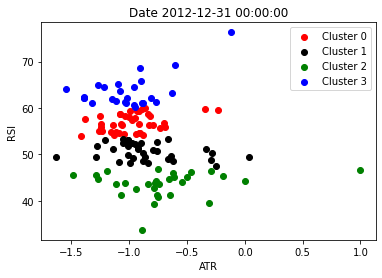

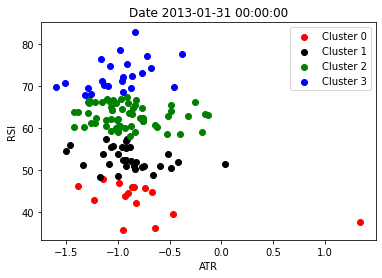

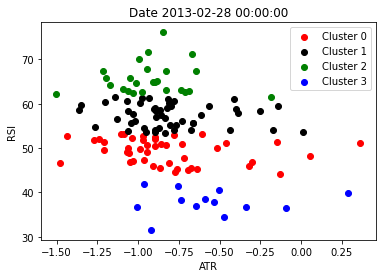

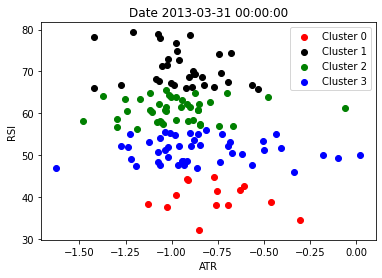

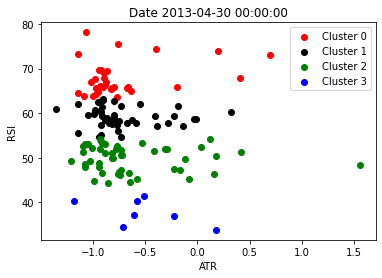

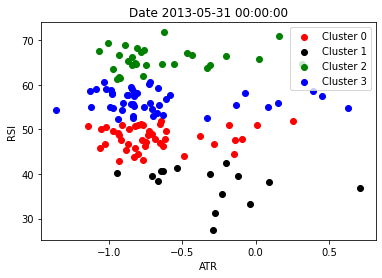

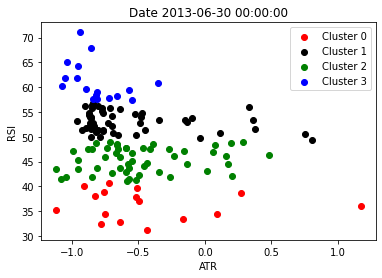

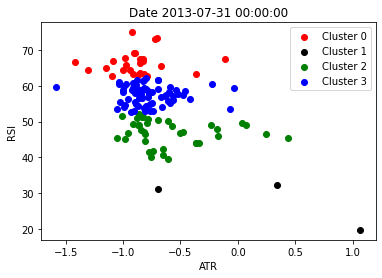

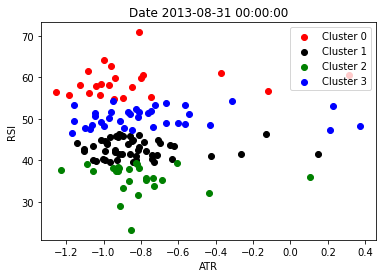

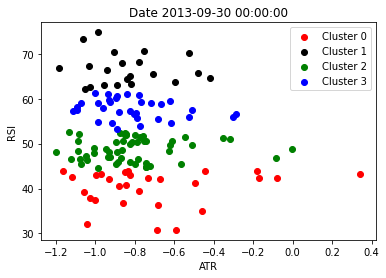

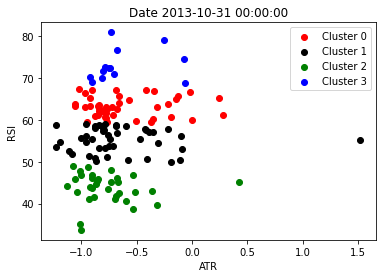

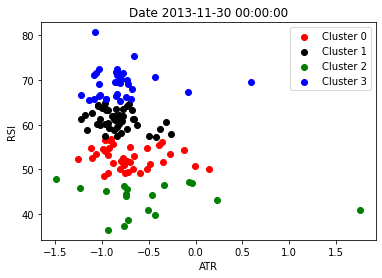

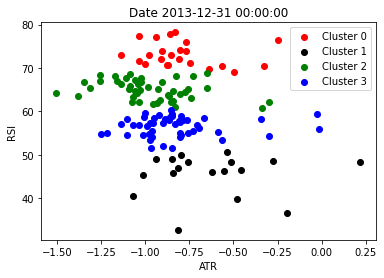

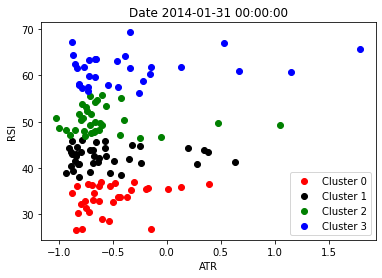

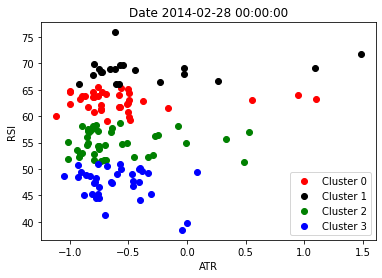

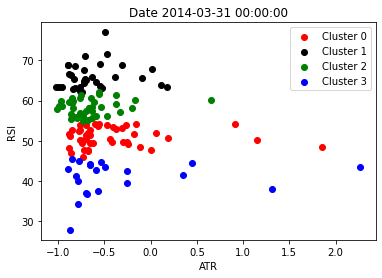

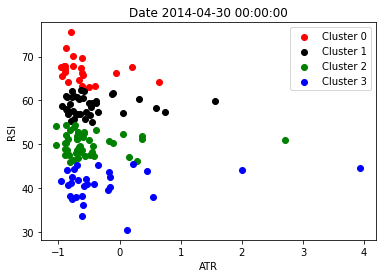

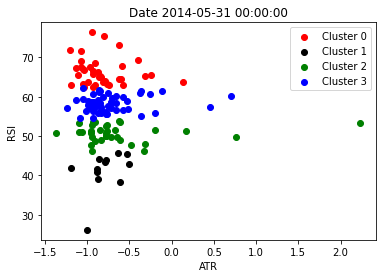

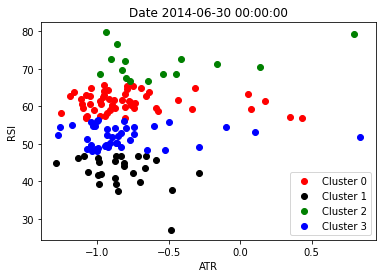

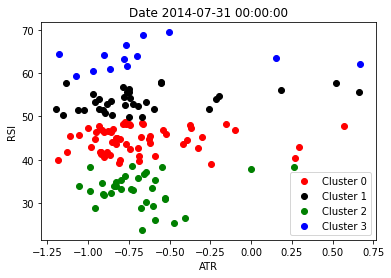

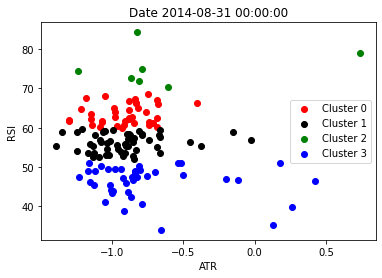

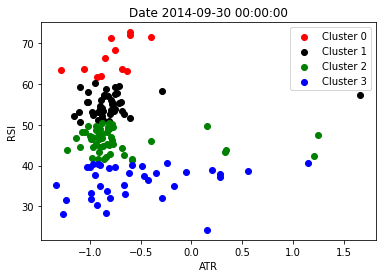

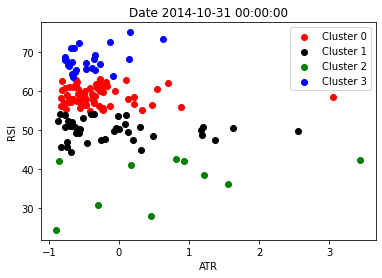

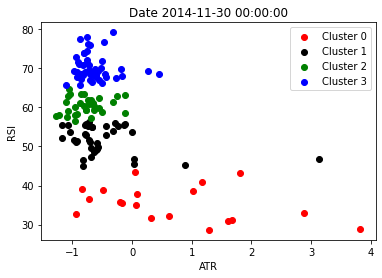

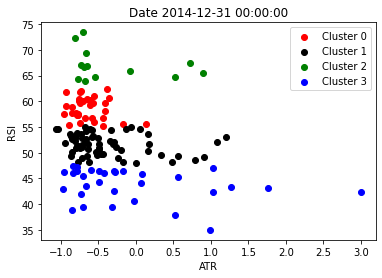

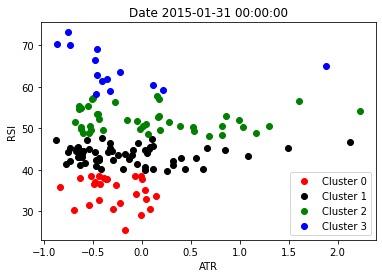

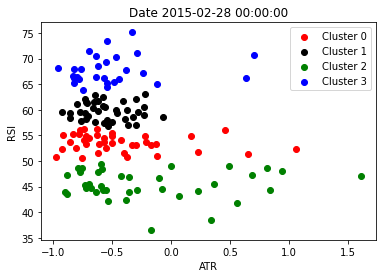

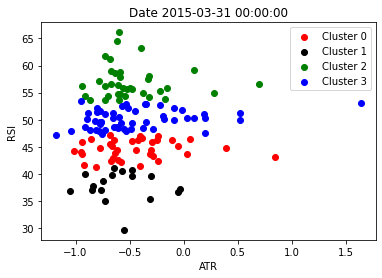

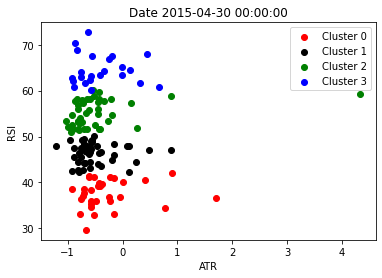

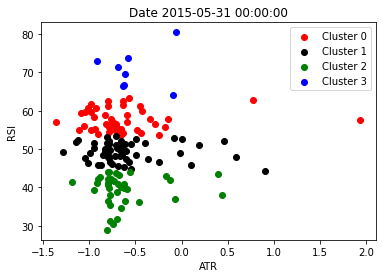

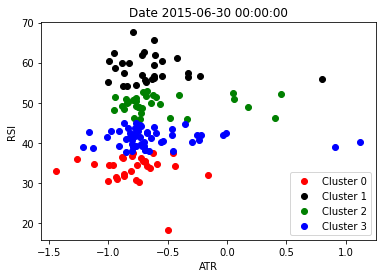

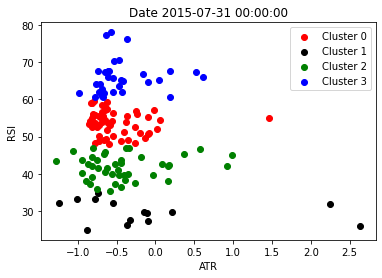

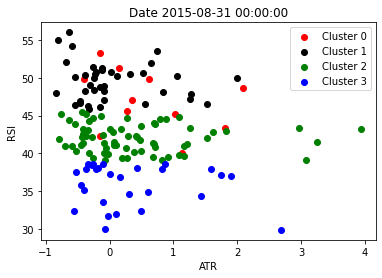

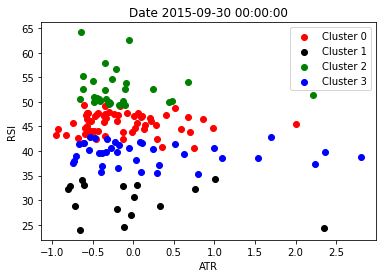

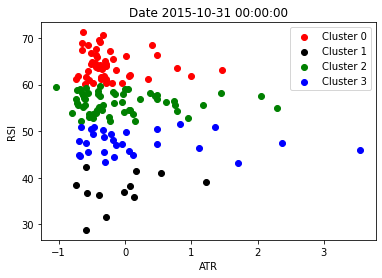

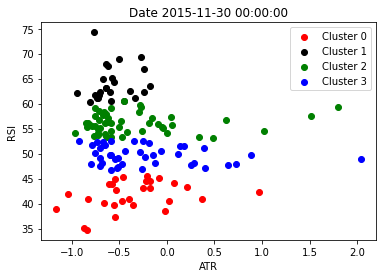

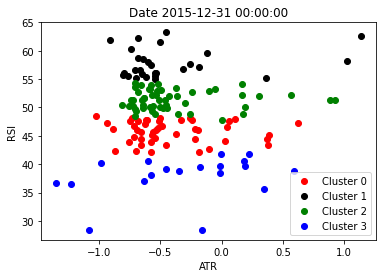

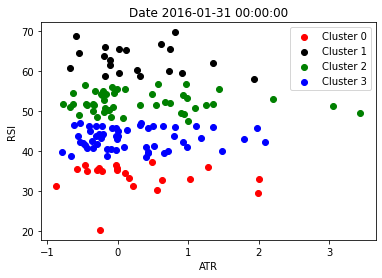

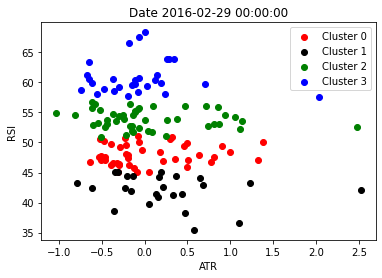

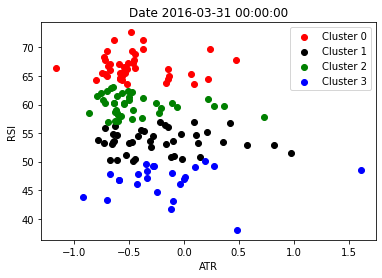

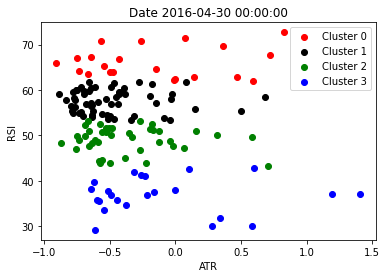

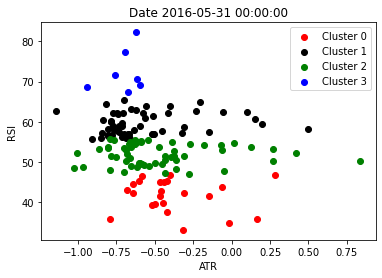

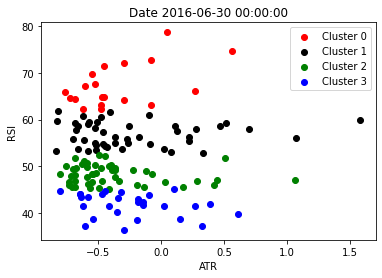

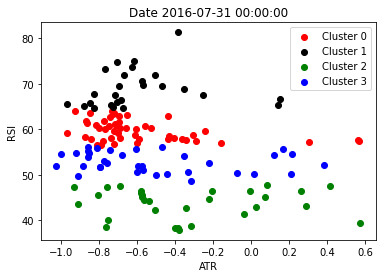

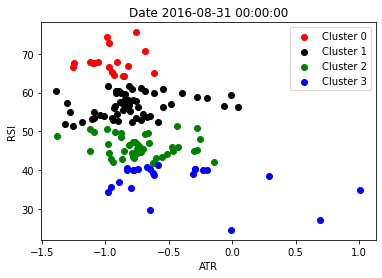

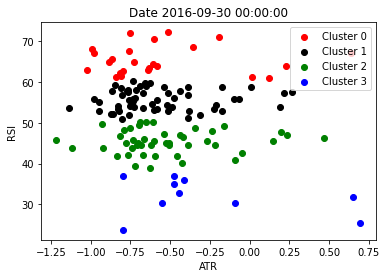

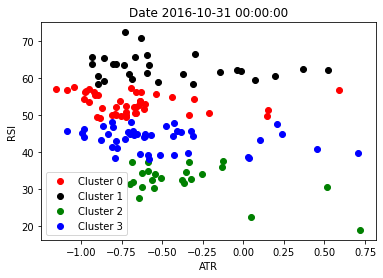

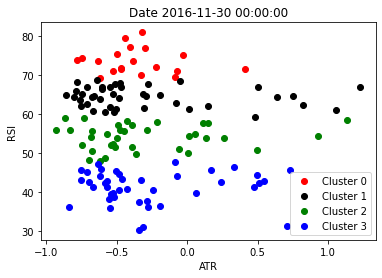

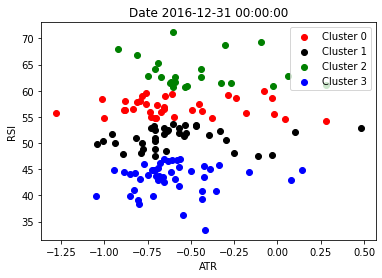

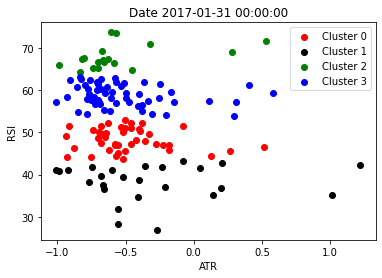

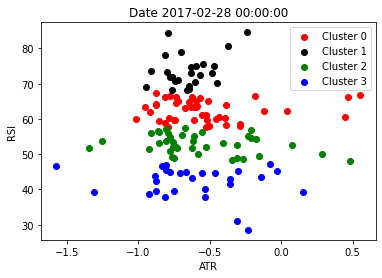

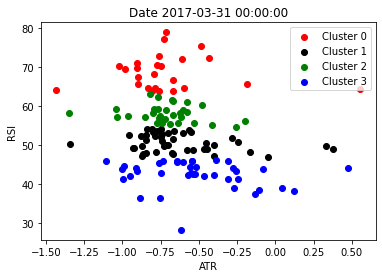

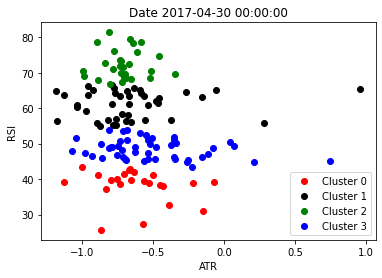

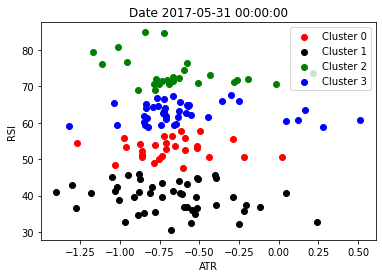

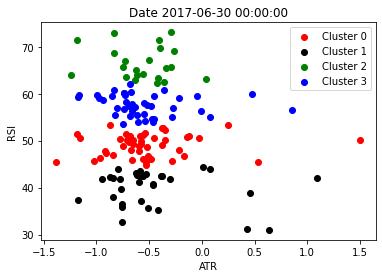

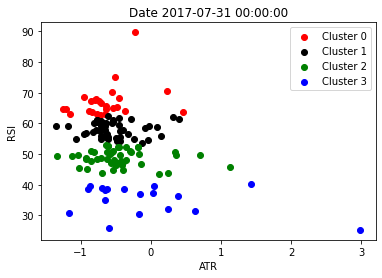

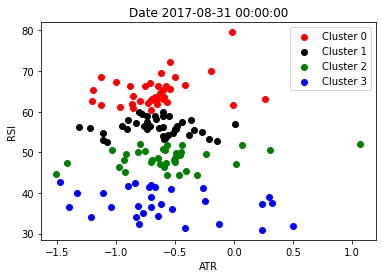

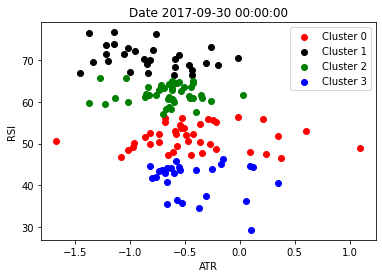

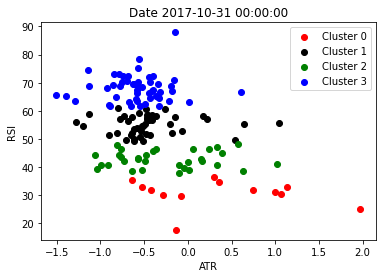

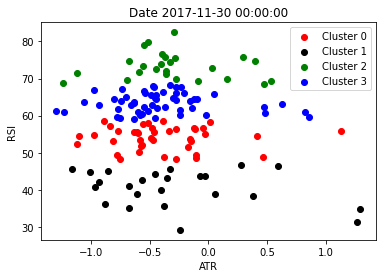

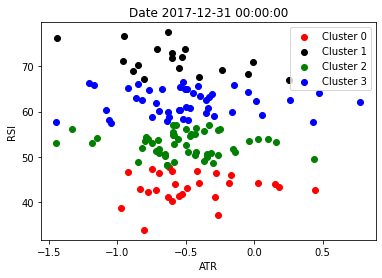

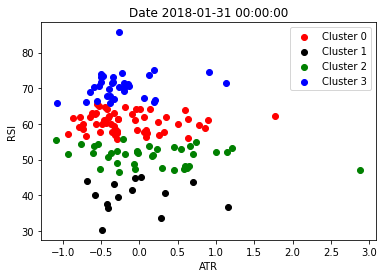

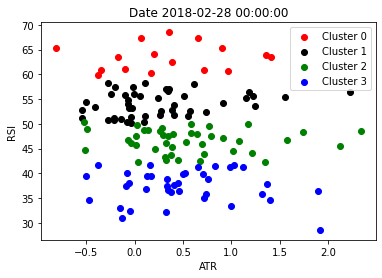

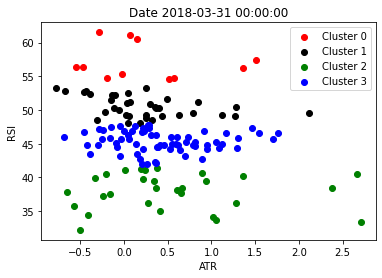

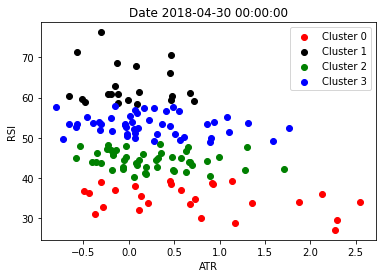

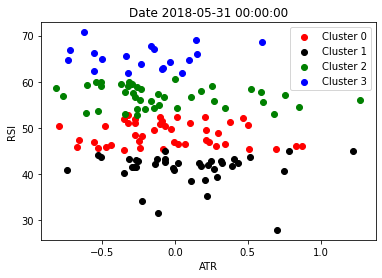

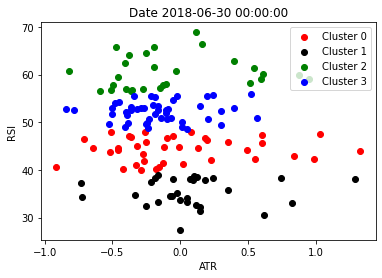

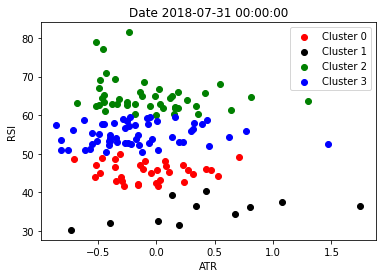

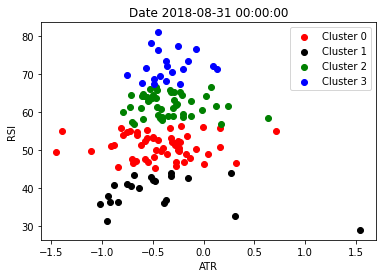

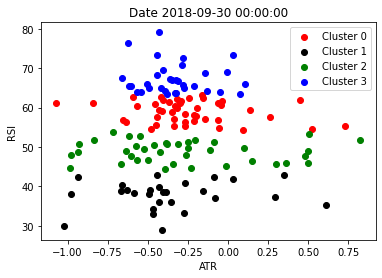

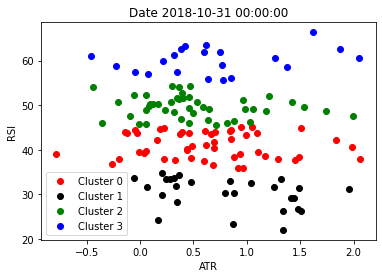

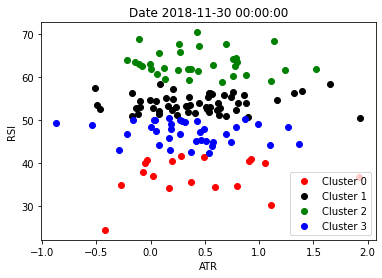

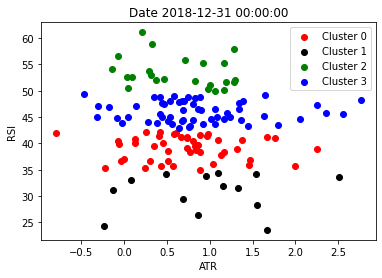

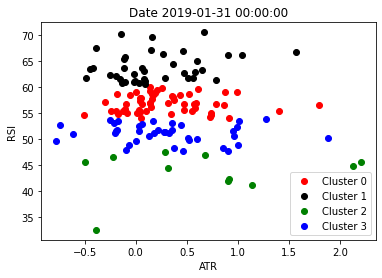

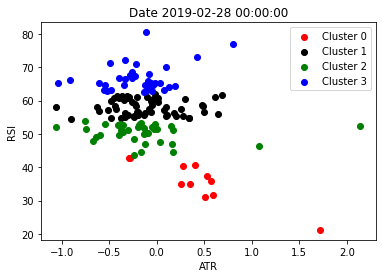

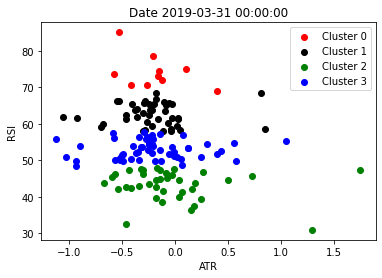

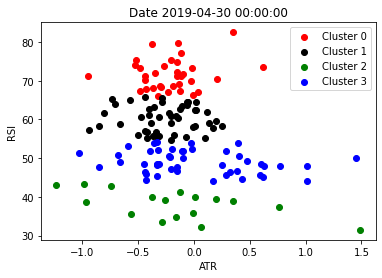

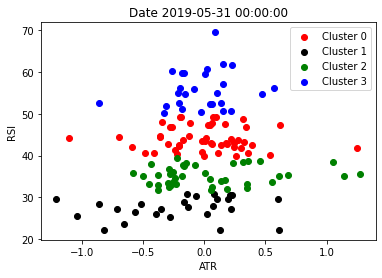

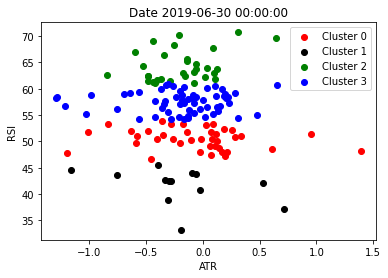

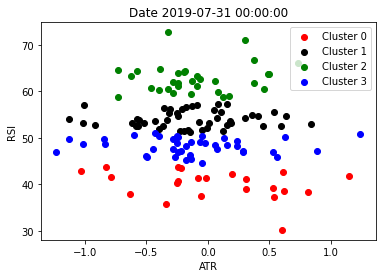

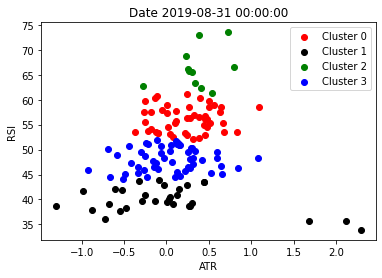

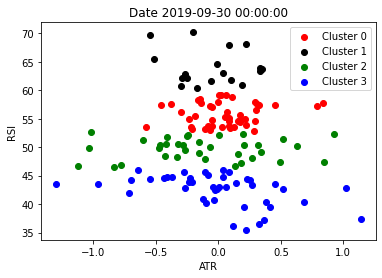

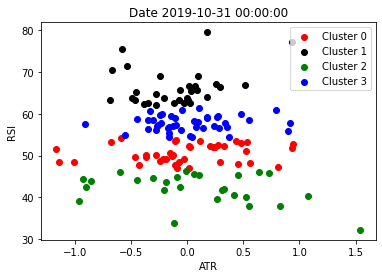

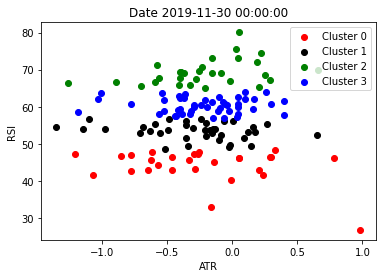

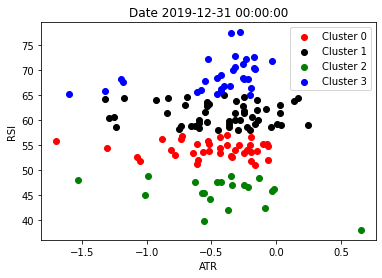

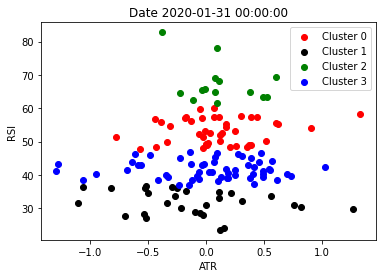

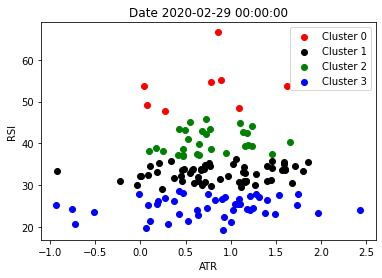

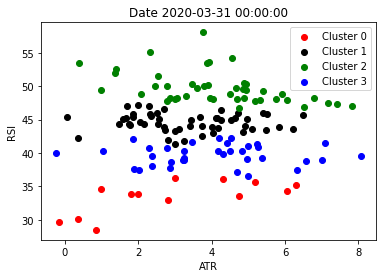

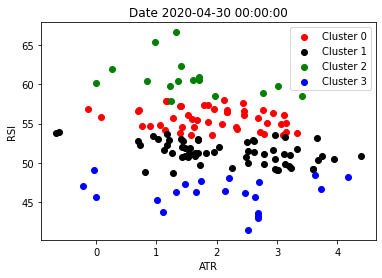

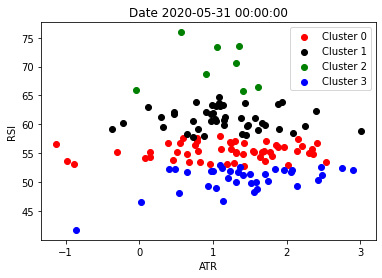

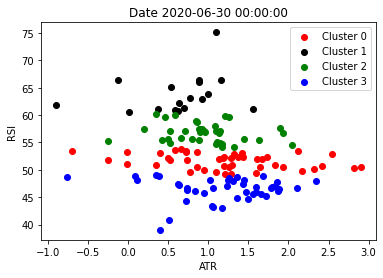

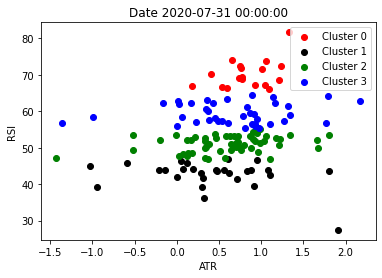

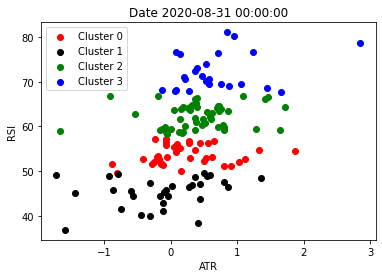

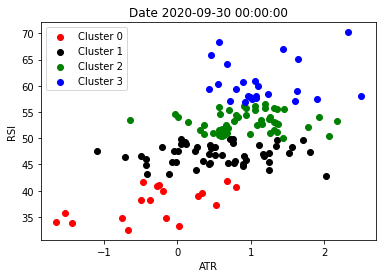

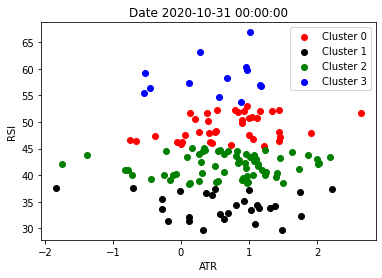

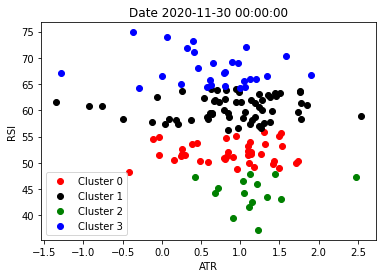

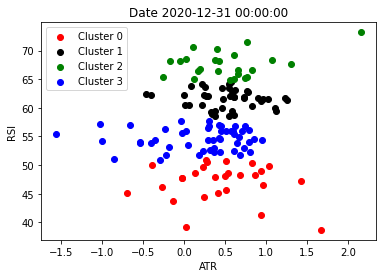

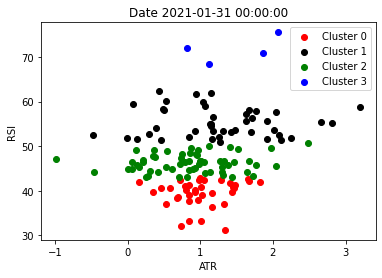

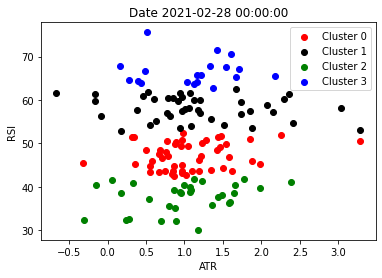

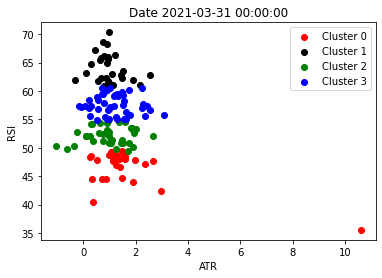

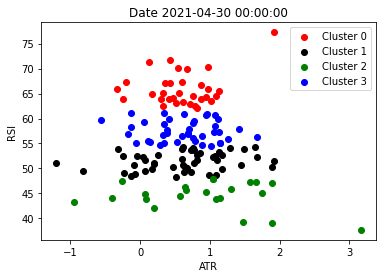

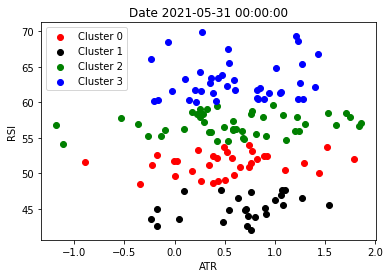

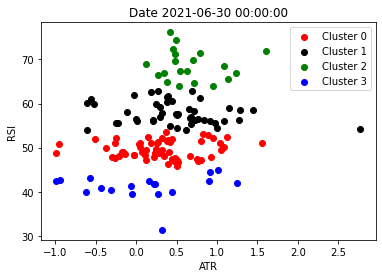

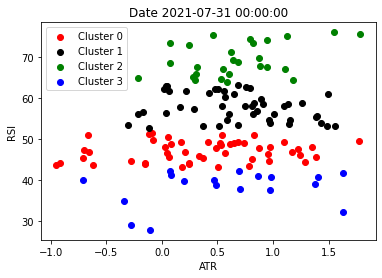

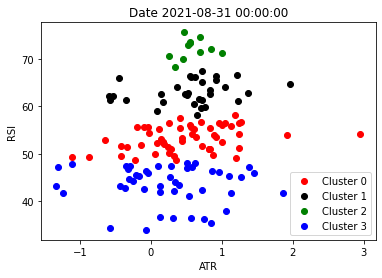

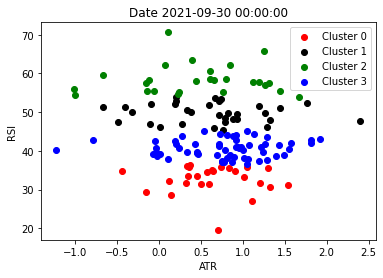

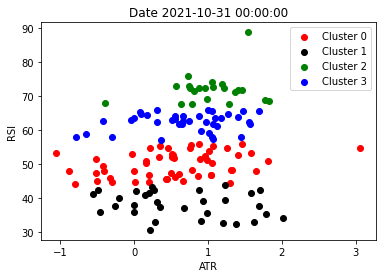

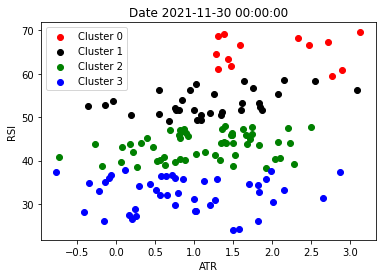

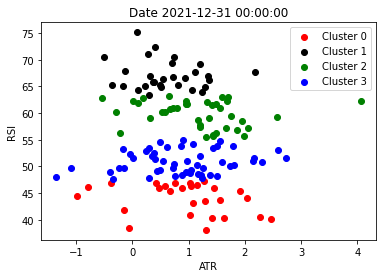

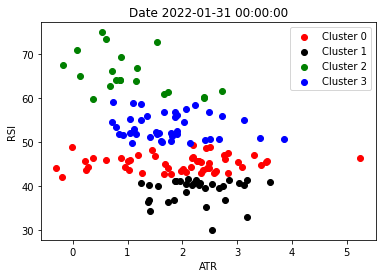

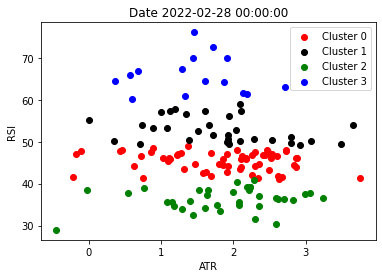

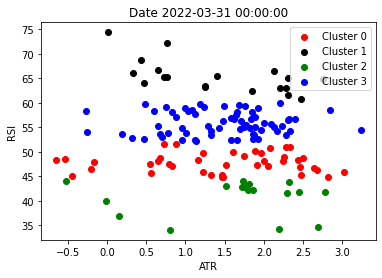

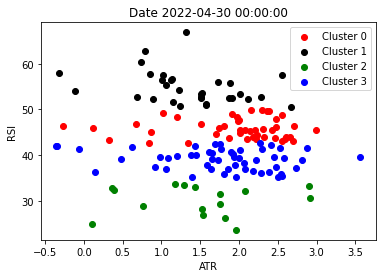

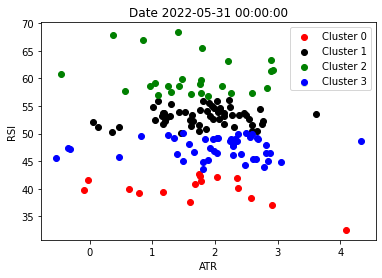

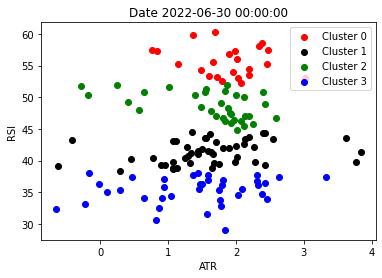

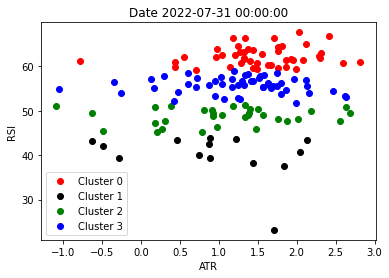

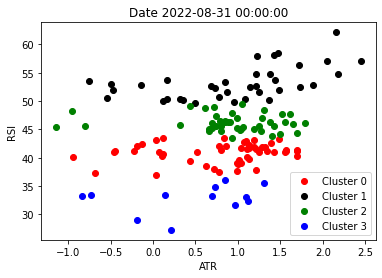

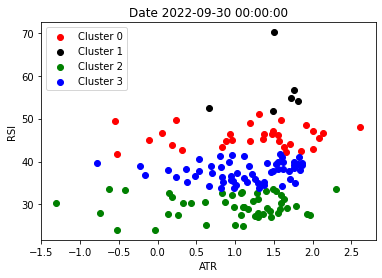

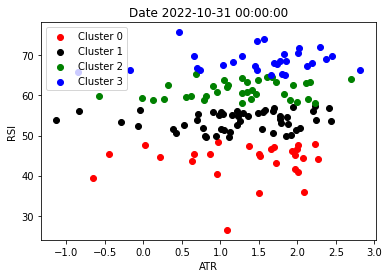

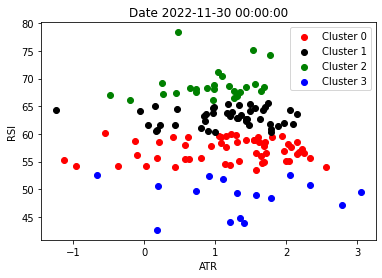

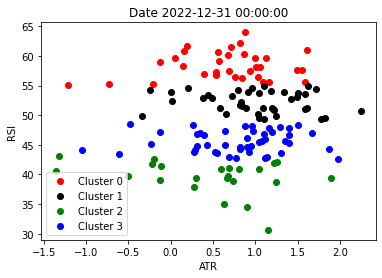

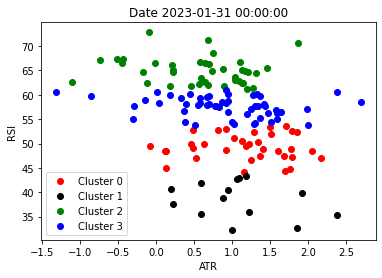

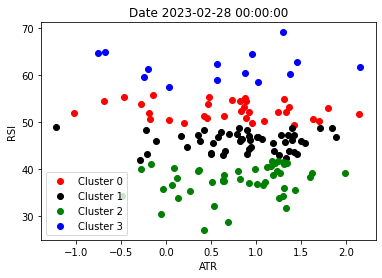

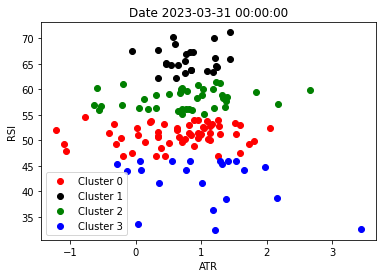

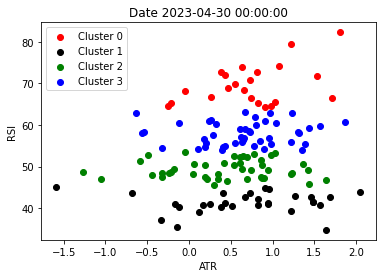

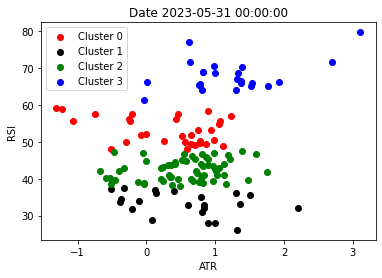

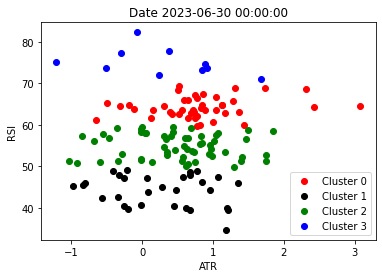

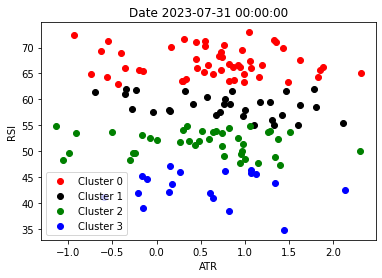

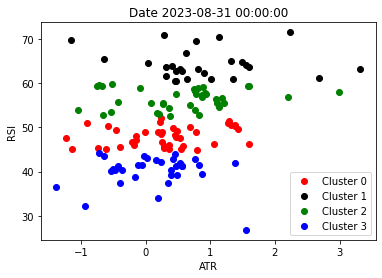

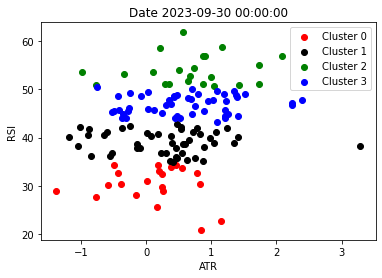

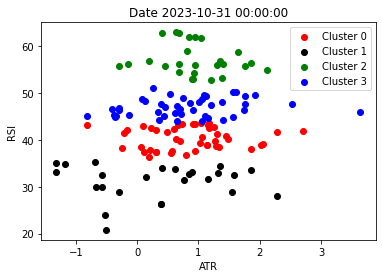

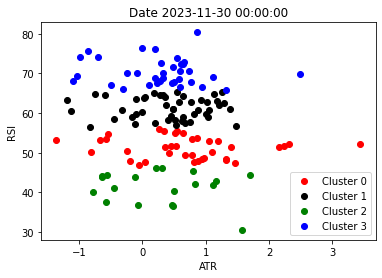

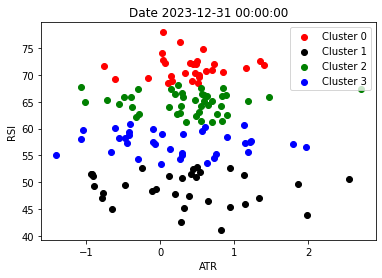

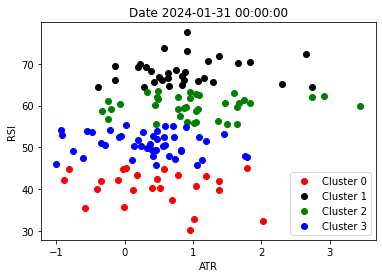

In [31]:
for i in stock_features_df.index.get_level_values('Date').unique().tolist():
    g = stock_features_df.xs(i,level=0)
    plt.title(f'Date {i}')
    plt.xlabel("ATR")
    plt.ylabel("RSI")
    plot_clusters(g)

In [32]:
stock_features_df#.columns[11]

Mkt-RF       SMB       HML       RMW       CMA  \
Date       company                                                     
2012-12-31 AAPL     1.149453 -0.143885 -0.330473  0.829612 -0.738197   
           ABT      0.972150 -0.166261 -0.554437  0.087570  0.519499   
           ACN      1.031557 -0.300186 -0.160462 -0.009853 -0.100162   
           ADBE     1.002618 -0.291989 -0.073798 -0.461770 -1.194540   
           AIG      1.048525 -0.472768  0.811720 -0.751355 -0.610846   
...                      ...       ...       ...       ...       ...   
2024-01-31 VRTX     0.360363  0.009740 -0.292414 -0.023400  0.717053   
           VZ       0.413433 -0.630758  0.467909  0.090499 -0.170135   
           WFC      0.984679  0.041834  1.666571 -0.284711 -1.269994   
           WMT      0.495847  0.145162 -0.483819  0.692959  0.586481   
           XOM      0.565615 -0.224614  0.516523  0.392930  0.333771   

                         ATR    BB_Low    BB_Mid  BB_Upper  GK Volatility  \
Date       company                                                          
2012-12-31 AAPL    -0.652302  2.778827  2.846073  2.913320      -0.003935   
           ABT     -0.924122  3.252231  3.268683  3.285136      -0.014091   
           ACN     -0.766088  3.996828  4.046955  4.097082      -0.013351   
           ADBE    -0.897150  3.567346  3.626436  3.685525       0.000183   
           AIG     -0.728984  3.297750  3.342037  3.386324      -0.018144   
...                      ...       ...       ...       ...            ...   
2024-01-31 VRTX     1.741230  6.023270  6.065050  6.106831       0.000374   
           VZ       0.380376  3.639249  3.715109  3.790970       0.000371   
           WFC     -0.071735  3.852729  3.904550  3.956372       0.000106   
           WMT      0.469686  3.975375  4.004873  4.034371       0.000040   
           XOM      0.477645  4.557785  4.607990  4.658196      -0.000093   

                        MACD        RSI  returns_1m  returns_2m  returns_3m  \
Date       company                                                            
2012-12-31 AAPL    -0.533124  44.756444   -0.090743   -0.052368   -0.064541   
           ABT     -0.175589  51.076481    0.007692    0.000000   -0.012714   
           ACN     -0.361509  44.317463   -0.020907   -0.006773   -0.013294   
           ADBE    -0.039514  65.897910    0.088703    0.052263    0.051179   
           AIG      0.433376  55.642365    0.065500    0.005282    0.024891   
...                      ...        ...         ...         ...         ...   
2024-01-31 VRTX     2.779769  61.349727    0.065104    0.105189    0.061719   
           VZ       2.145369  68.254013    0.093687    0.053071    0.044826   
           WFC      0.874937  60.466344    0.019504    0.060832    0.078318   
           WMT      1.329154  62.085012    0.048208    0.032156    0.004980   
           XOM      0.277996  53.953122    0.028306    0.000341   -0.006657   

                    returns_6m  returns_9m  returns_12m  cluster  
Date       company                                                
2012-12-31 AAPL      -0.013918   -0.012189     0.023771        2  
           ABT        0.005167    0.010052     0.015517        1  
           ACN        0.019000    0.005890     0.020618        2  
           ADBE       0.025639    0.010465     0.024233        3  
           AIG        0.016017    0.015158     0.034738        0  
...                        ...         ...          ...      ...  
2024-01-31 VRTX       0.035105    0.027085     0.024773        2  
           VZ         0.033008    0.015944     0.007578        1  
           WFC        0.016835    0.029020     0.008289        2  
           WMT        0.006759    0.011333     0.012890        2  
           XOM       -0.004145   -0.012672    -0.007242        3  

[19035 rows x 19 columns]

### Pre-Defined Centroids

In [33]:
# Must be shape (n_features, n_clusters)
initial_centroids = np.zeros((4,18))

### Target RSI Values

In [34]:
target_rsi_values = [30, 45, 55, 70]
initial_centroids[:, 11] = target_rsi_values
initial_centroids

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 30.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 45.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 55.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 70.,  0.,
         0.,  0.,  0.,  0.,  0.]])

In [35]:
def get_clusters_improved(df):
    df['cluster'] = KMeans(n_clusters = 4, random_state = 42, init = initial_centroids).fit(df).labels_
    return df
stock_features_df = stock_features_df.drop('cluster',axis=1)
stock_features_df = stock_features_df.groupby('Date',group_keys=False).apply(get_clusters_improved)
stock_features_df

Mkt-RF       SMB       HML       RMW       CMA  \
Date       company                                                     
2012-12-31 AAPL     1.149453 -0.143885 -0.330473  0.829612 -0.738197   
           ABT      0.972150 -0.166261 -0.554437  0.087570  0.519499   
           ACN      1.031557 -0.300186 -0.160462 -0.009853 -0.100162   
           ADBE     1.002618 -0.291989 -0.073798 -0.461770 -1.194540   
           AIG      1.048525 -0.472768  0.811720 -0.751355 -0.610846   
...                      ...       ...       ...       ...       ...   
2024-01-31 VRTX     0.360363  0.009740 -0.292414 -0.023400  0.717053   
           VZ       0.413433 -0.630758  0.467909  0.090499 -0.170135   
           WFC      0.984679  0.041834  1.666571 -0.284711 -1.269994   
           WMT      0.495847  0.145162 -0.483819  0.692959  0.586481   
           XOM      0.565615 -0.224614  0.516523  0.392930  0.333771   

                         ATR    BB_Low    BB_Mid  BB_Upper  GK Volatility  \
Date       company                                                          
2012-12-31 AAPL    -0.652302  2.778827  2.846073  2.913320      -0.003935   
           ABT     -0.924122  3.252231  3.268683  3.285136      -0.014091   
           ACN     -0.766088  3.996828  4.046955  4.097082      -0.013351   
           ADBE    -0.897150  3.567346  3.626436  3.685525       0.000183   
           AIG     -0.728984  3.297750  3.342037  3.386324      -0.018144   
...                      ...       ...       ...       ...            ...   
2024-01-31 VRTX     1.741230  6.023270  6.065050  6.106831       0.000374   
           VZ       0.380376  3.639249  3.715109  3.790970       0.000371   
           WFC     -0.071735  3.852729  3.904550  3.956372       0.000106   
           WMT      0.469686  3.975375  4.004873  4.034371       0.000040   
           XOM      0.477645  4.557785  4.607990  4.658196      -0.000093   

                        MACD        RSI  returns_1m  returns_2m  returns_3m  \
Date       company                                                            
2012-12-31 AAPL    -0.533124  44.756444   -0.090743   -0.052368   -0.064541   
           ABT     -0.175589  51.076481    0.007692    0.000000   -0.012714   
           ACN     -0.361509  44.317463   -0.020907   -0.006773   -0.013294   
           ADBE    -0.039514  65.897910    0.088703    0.052263    0.051179   
           AIG      0.433376  55.642365    0.065500    0.005282    0.024891   
...                      ...        ...         ...         ...         ...   
2024-01-31 VRTX     2.779769  61.349727    0.065104    0.105189    0.061719   
           VZ       2.145369  68.254013    0.093687    0.053071    0.044826   
           WFC      0.874937  60.466344    0.019504    0.060832    0.078318   
           WMT      1.329154  62.085012    0.048208    0.032156    0.004980   
           XOM      0.277996  53.953122    0.028306    0.000341   -0.006657   

                    returns_6m  returns_9m  returns_12m  cluster  
Date       company                                                
2012-12-31 AAPL      -0.013918   -0.012189     0.023771        0  
           ABT        0.005167    0.010052     0.015517        1  
           ACN        0.019000    0.005890     0.020618        0  
           ADBE       0.025639    0.010465     0.024233        3  
           AIG        0.016017    0.015158     0.034738        2  
...                        ...         ...          ...      ...  
2024-01-31 VRTX       0.035105    0.027085     0.024773        3  
           VZ         0.033008    0.015944     0.007578        3  
           WFC        0.016835    0.029020     0.008289        2  
           WMT        0.006759    0.011333     0.012890        3  
           XOM       -0.004145   -0.012672    -0.007242        2  

[19035 rows x 19 columns]

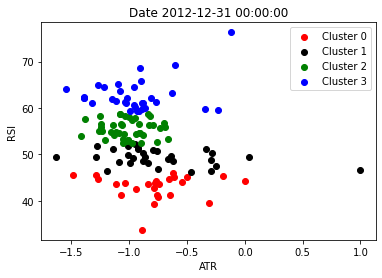

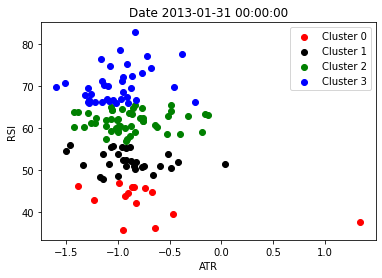

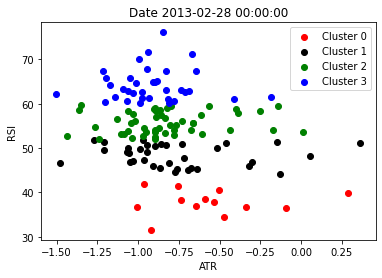

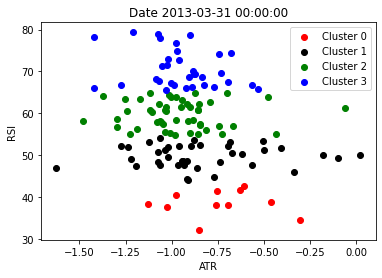

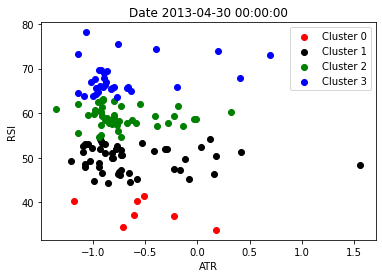

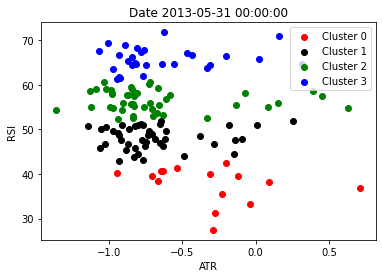

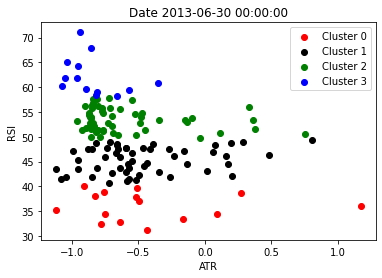

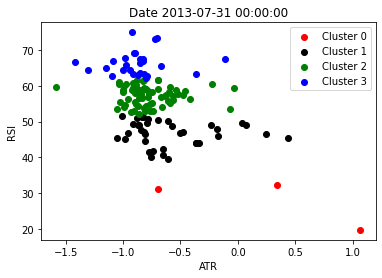

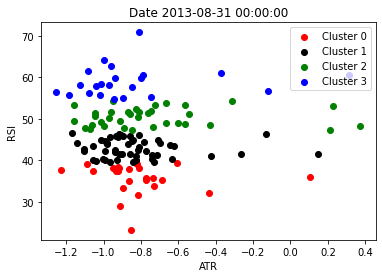

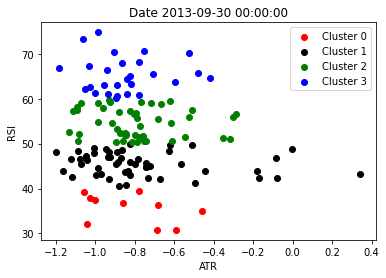

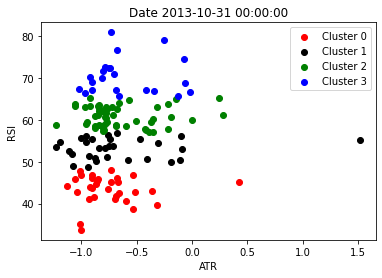

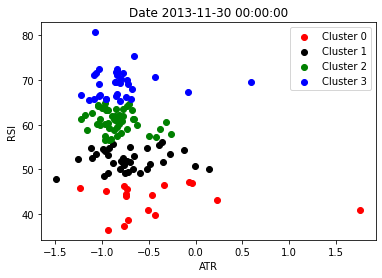

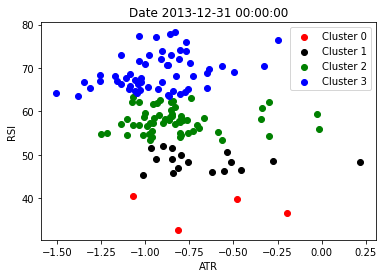

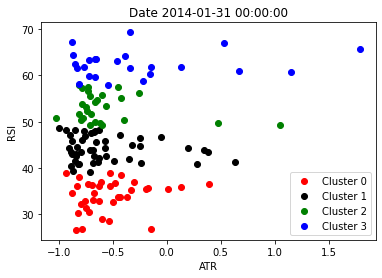

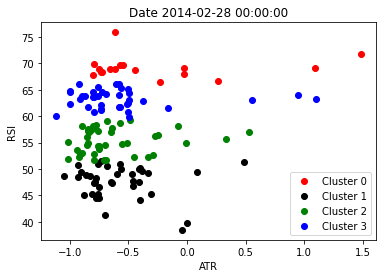

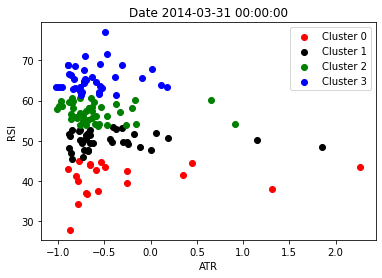

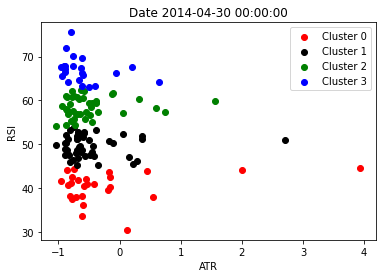

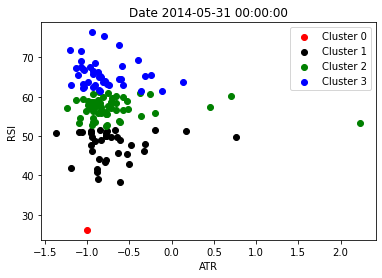

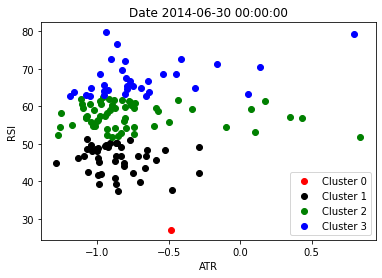

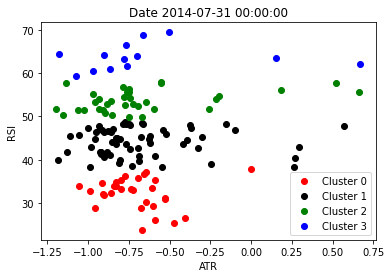

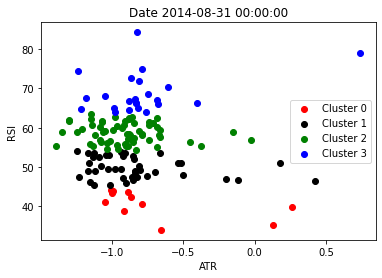

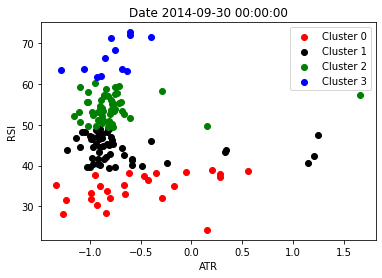

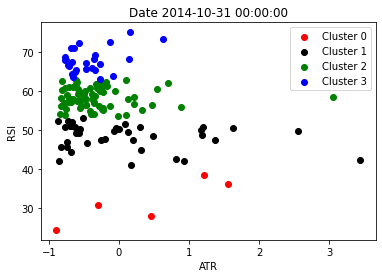

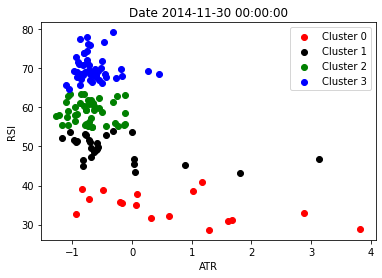

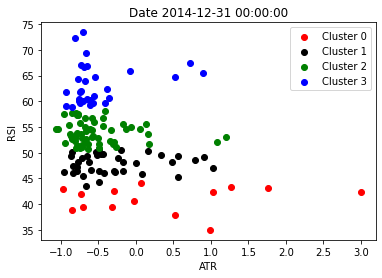

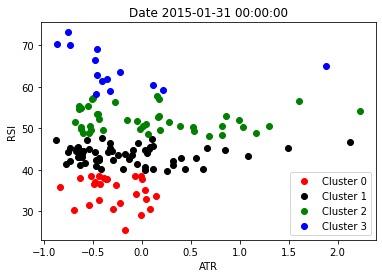

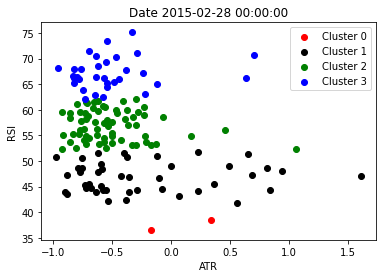

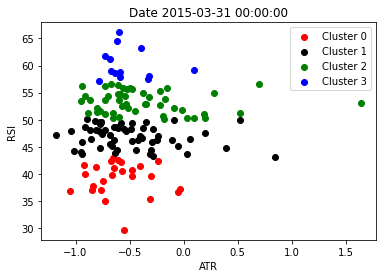

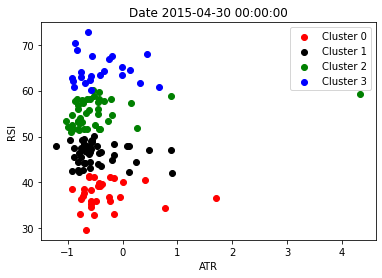

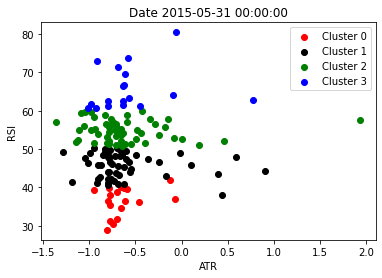

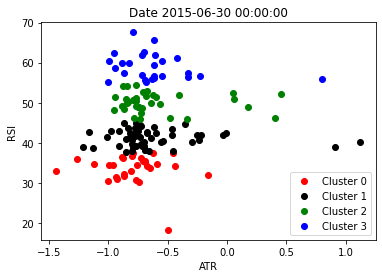

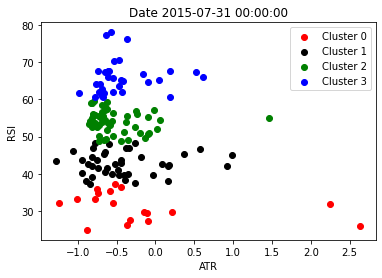

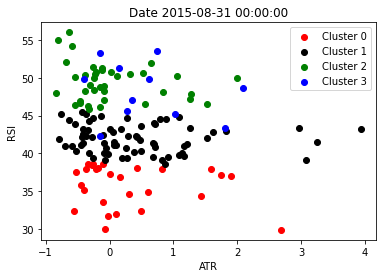

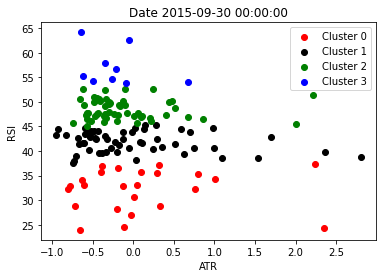

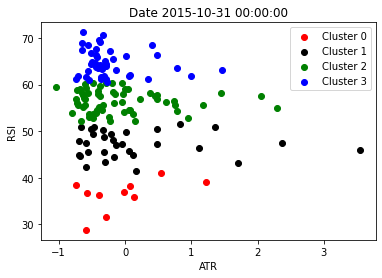

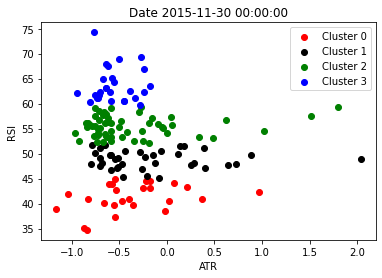

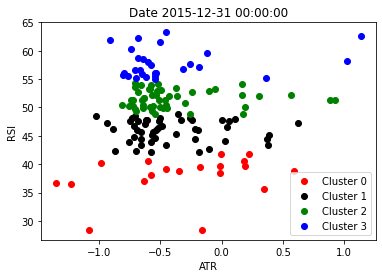

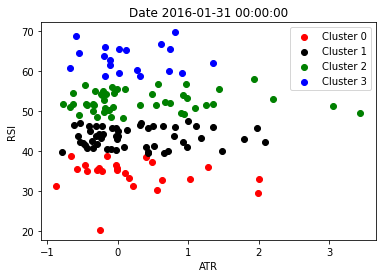

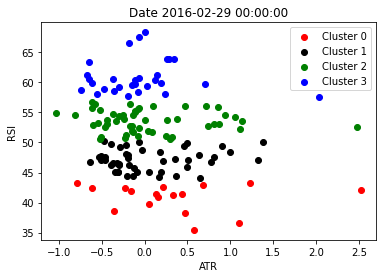

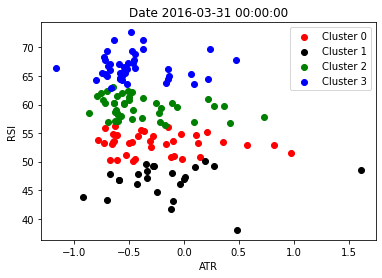

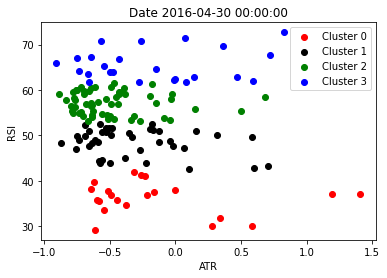

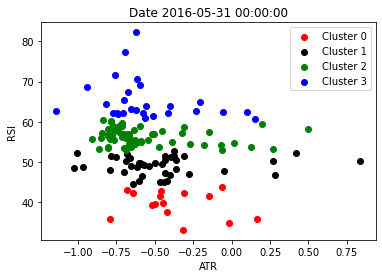

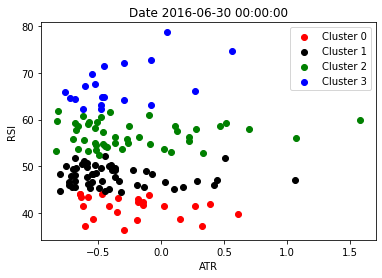

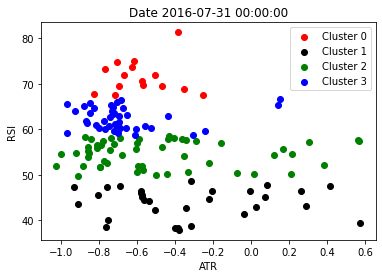

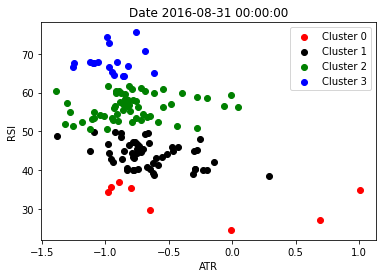

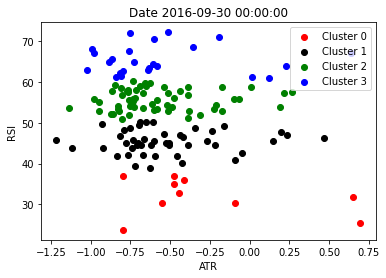

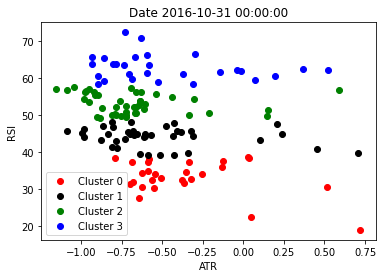

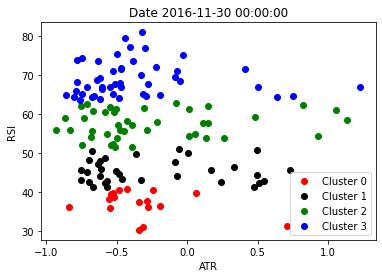

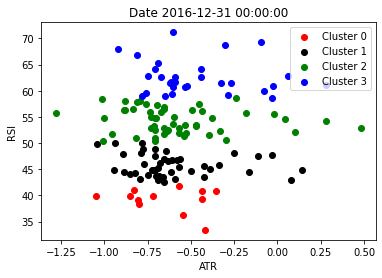

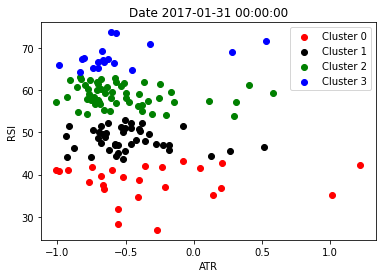

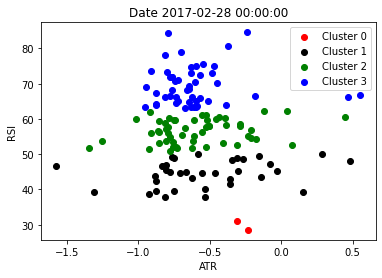

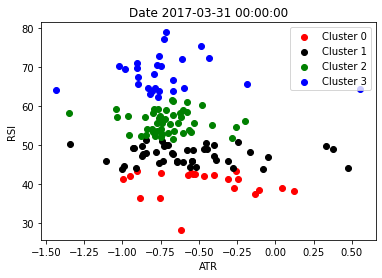

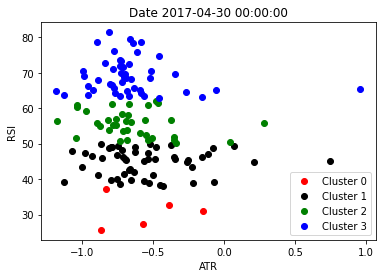

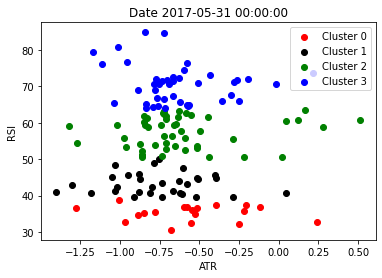

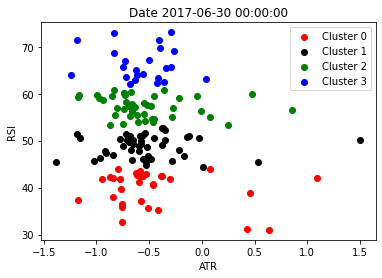

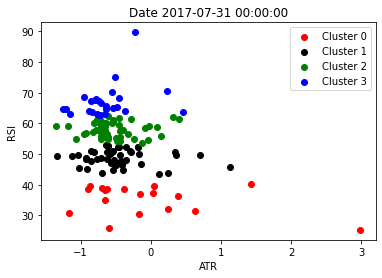

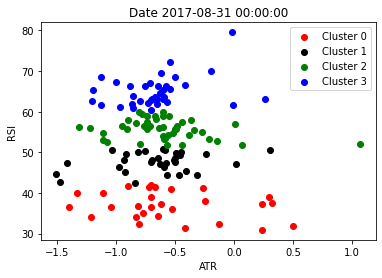

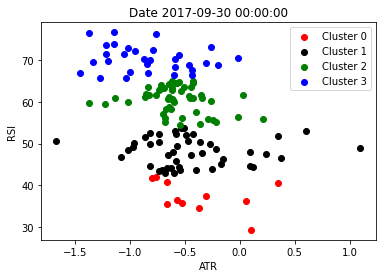

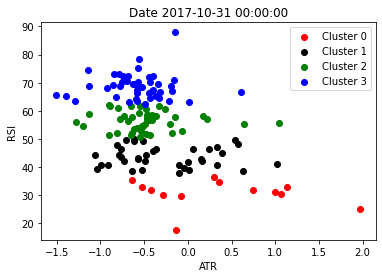

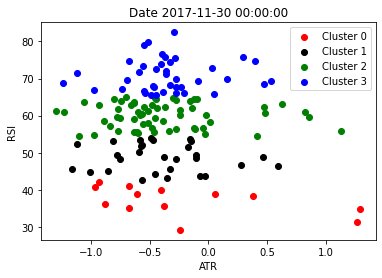

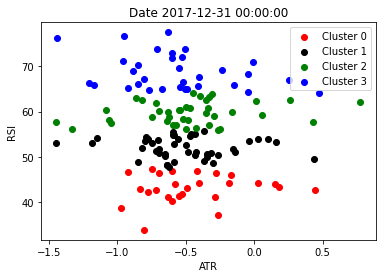

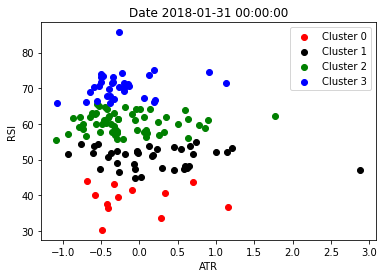

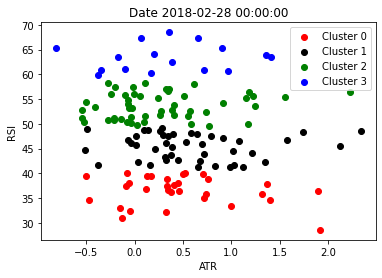

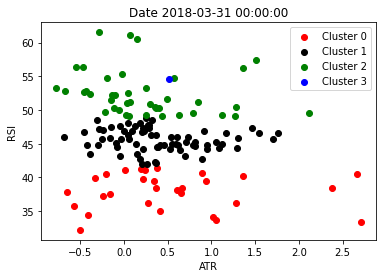

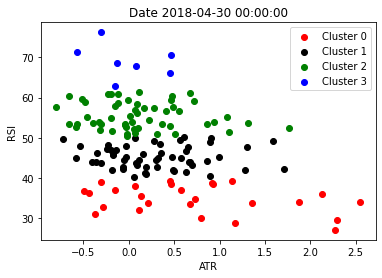

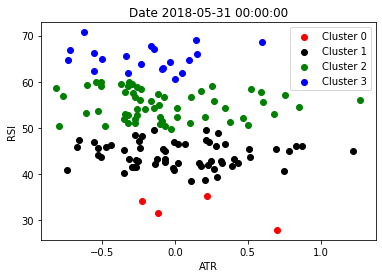

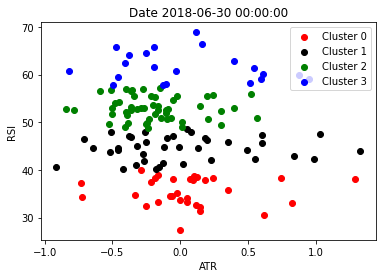

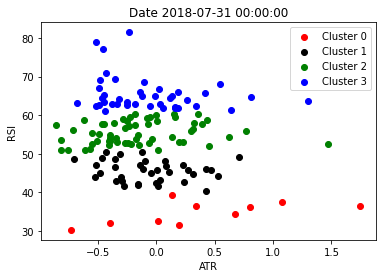

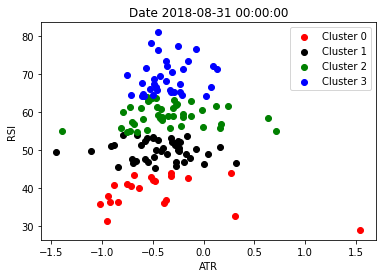

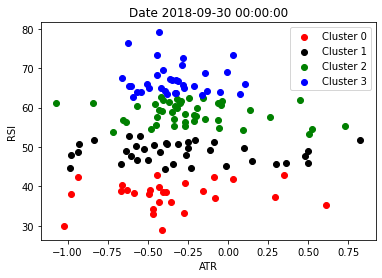

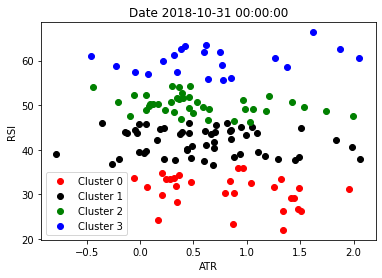

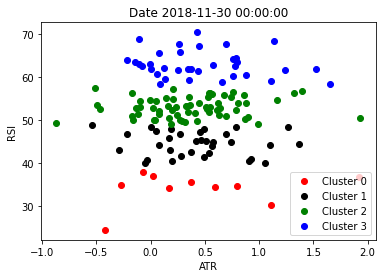

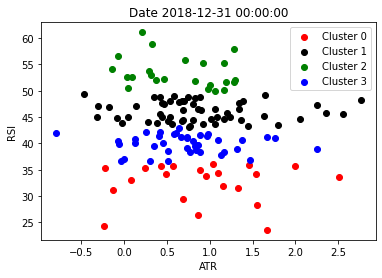

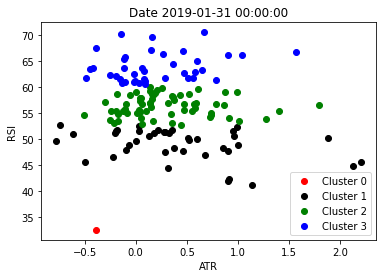

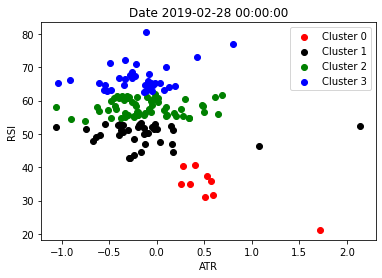

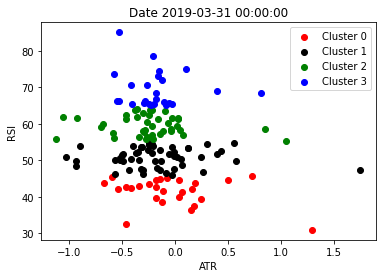

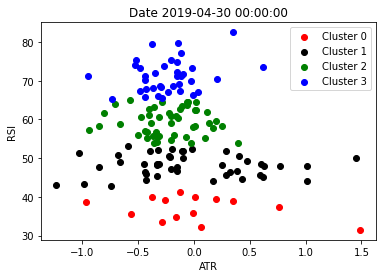

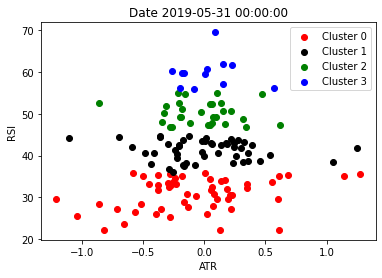

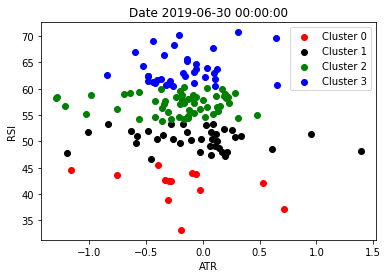

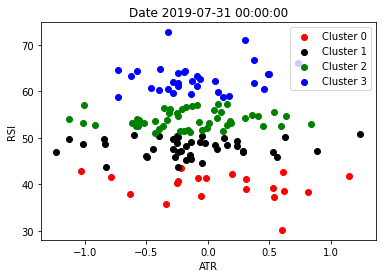

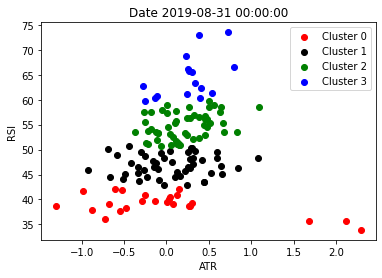

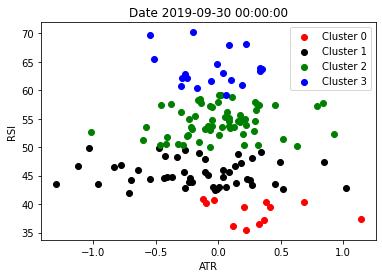

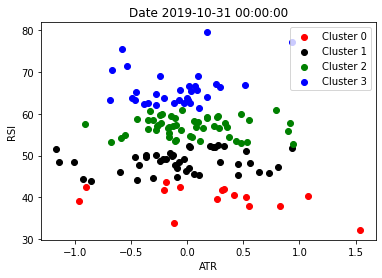

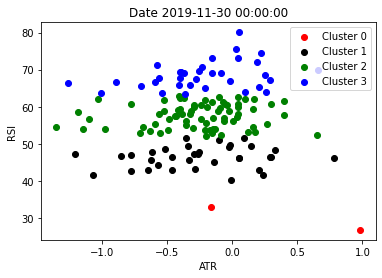

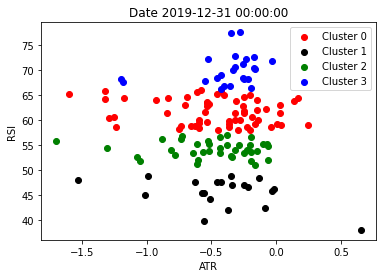

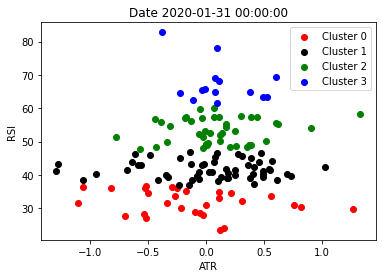

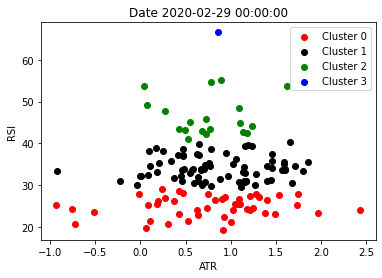

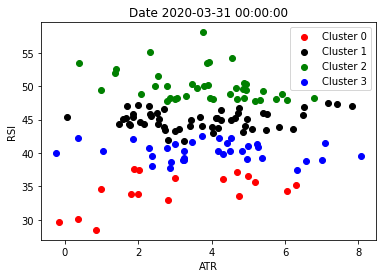

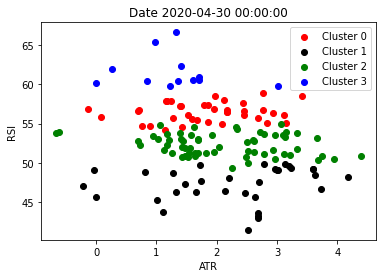

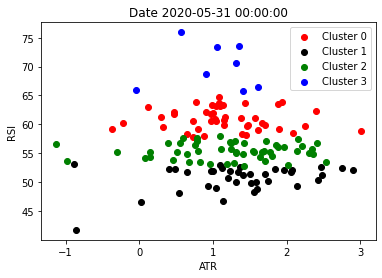

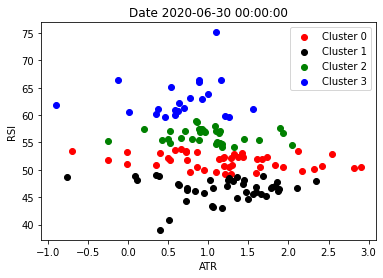

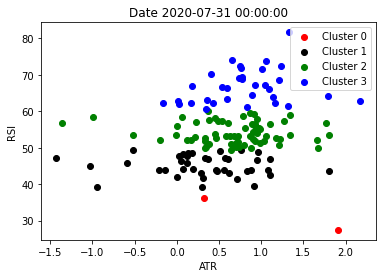

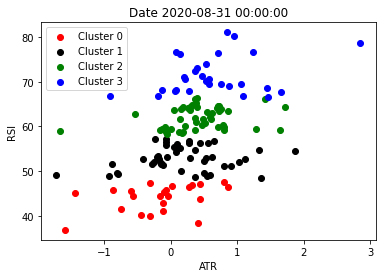

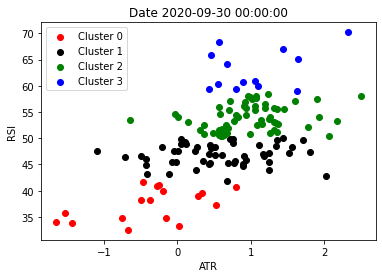

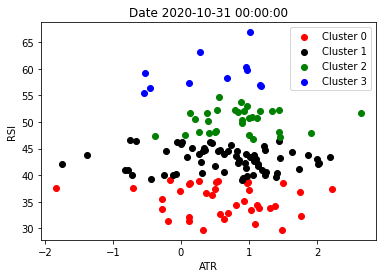

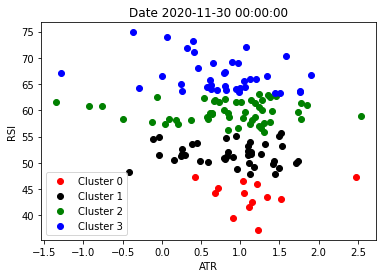

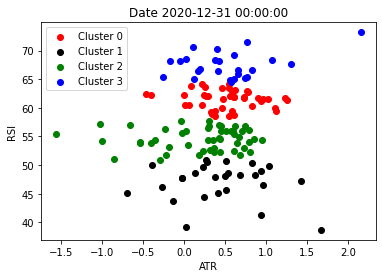

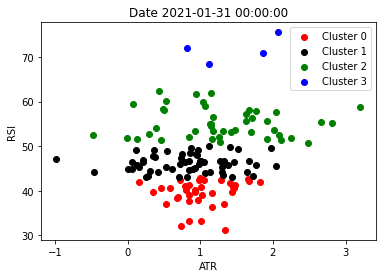

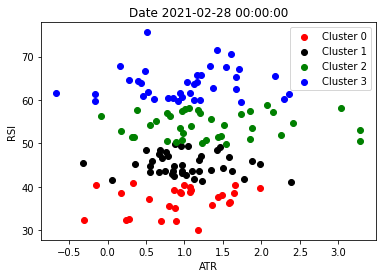

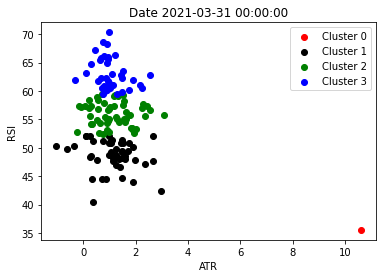

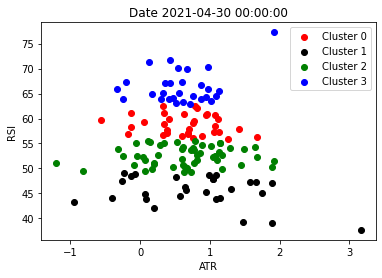

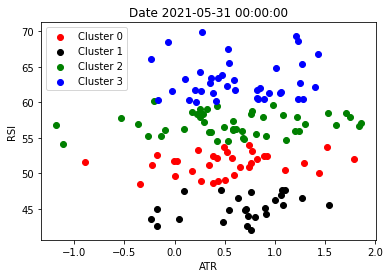

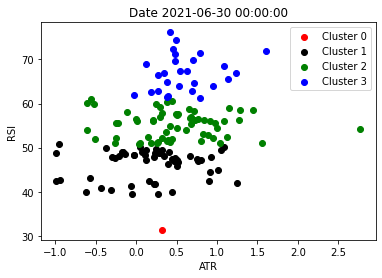

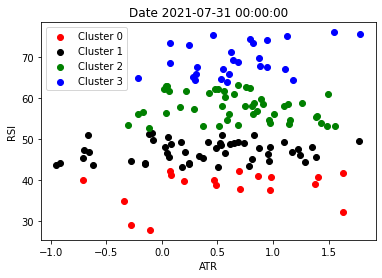

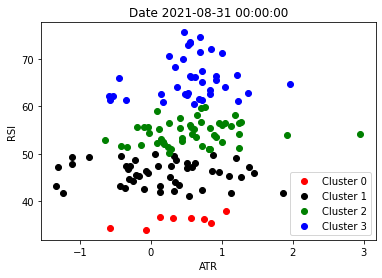

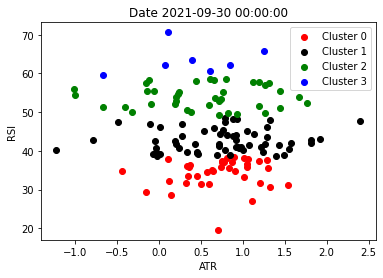

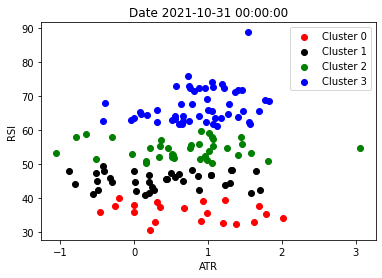

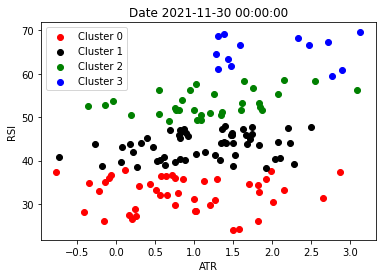

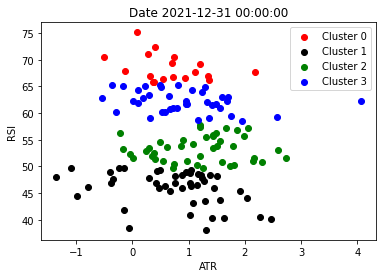

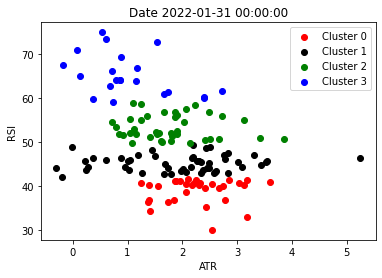

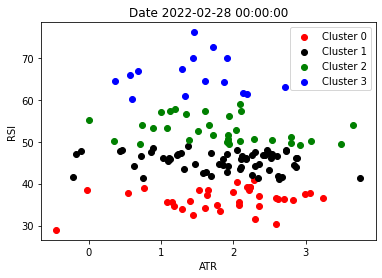

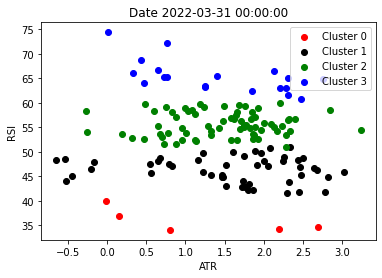

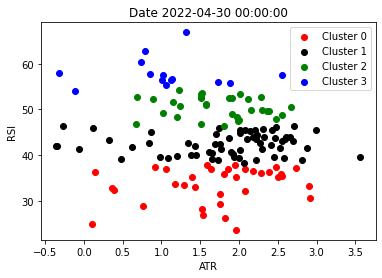

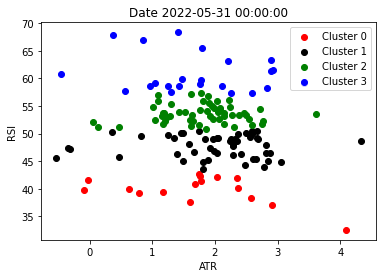

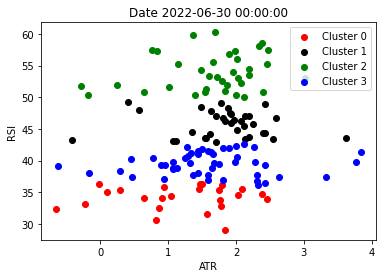

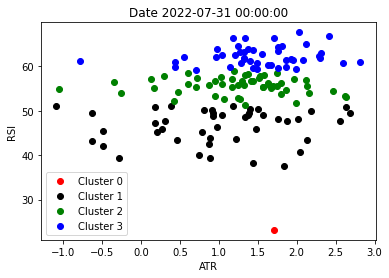

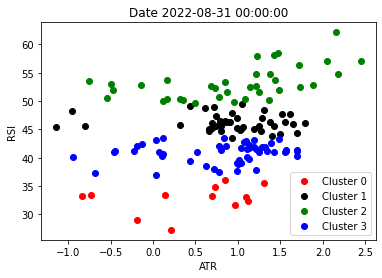

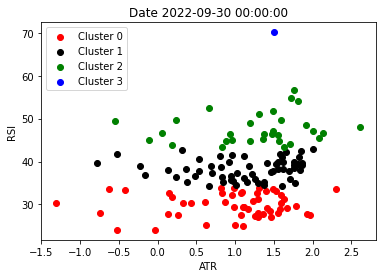

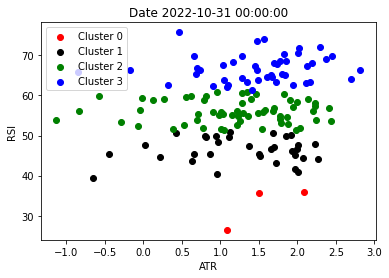

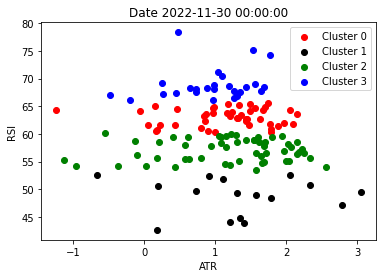

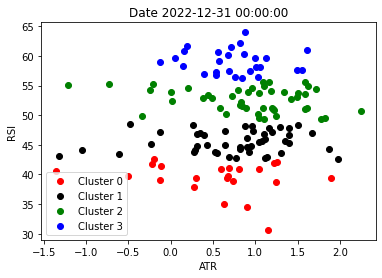

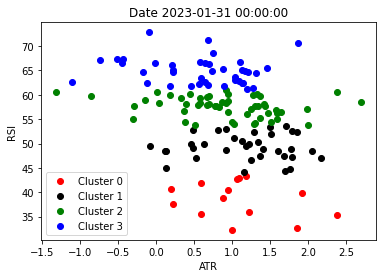

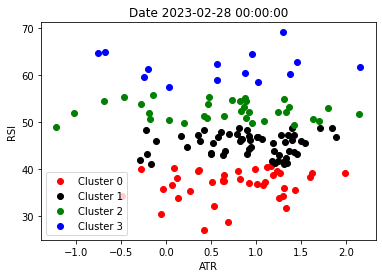

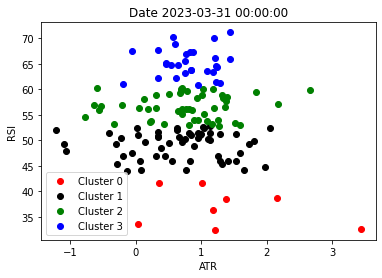

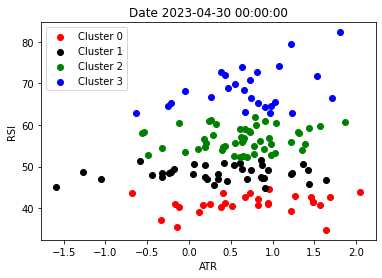

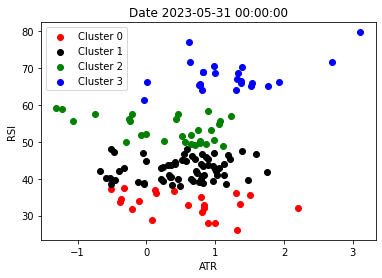

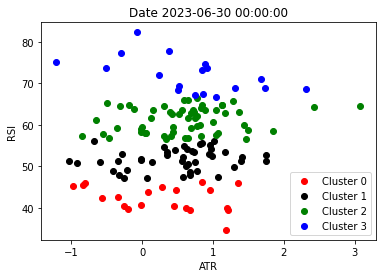

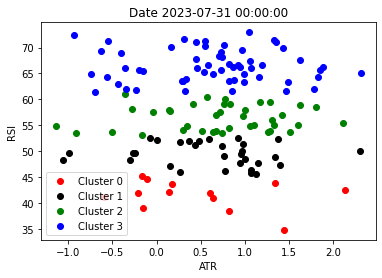

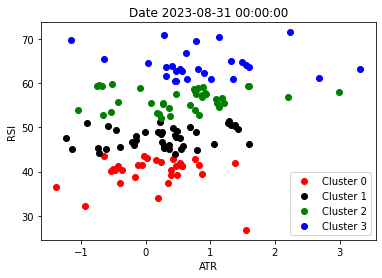

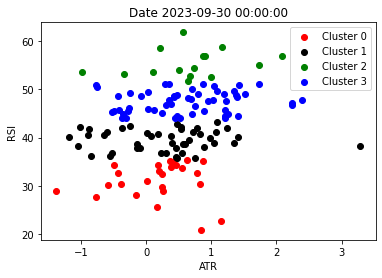

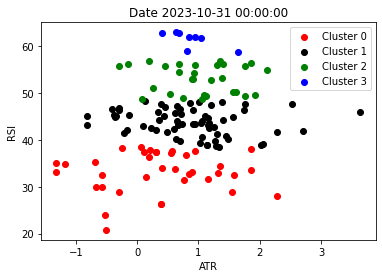

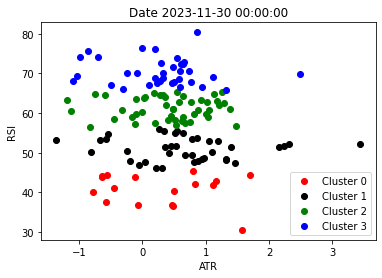

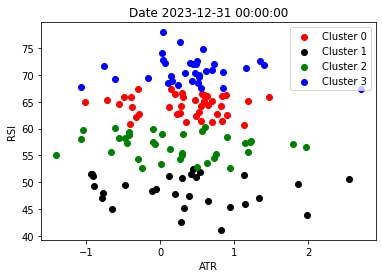

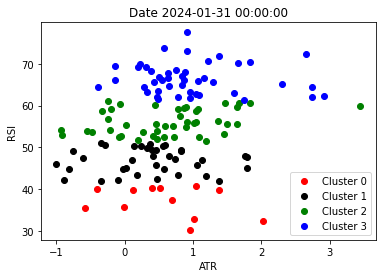

In [36]:
for i in stock_features_df.index.get_level_values('Date').unique().tolist():
    g = stock_features_df.xs(i,level=0)
    plt.title(f'Date {i}')
    plt.xlabel("ATR")
    plt.ylabel("RSI")
    plot_clusters(g)

## Select stocks based off cluster, form portfolio based on Efficient Frontier max Sharp Ratio Optimization

Hypothesis: stocks clustered around RSI 70 will outperform in following month (Cluster 3)

In [37]:
max_rsi_df = stock_features_df[stock_features_df['cluster'] == 3]
max_rsi_df = max_rsi_df.reset_index(level=1)

In [38]:
max_rsi_df.index = max_rsi_df.index + pd.DateOffset(1)
max_rsi_df = max_rsi_df.reset_index().set_index(['Date','company'])
max_rsi_df

Mkt-RF       SMB       HML       RMW       CMA  \
Date       company                                                     
2013-01-01 ADBE     1.002618 -0.291989 -0.073798 -0.461770 -1.194540   
           AMAT     1.240703  0.489126  0.393361 -0.178412 -0.558397   
           AMT      0.585259 -0.440180 -0.383600  0.282644  0.270695   
           BAC      1.194028 -0.295566  1.361636 -0.959860 -0.826196   
           BK       1.126509 -0.339394  1.124036 -0.531726 -0.533441   
...                      ...       ...       ...       ...       ...   
2024-02-01 V        0.914717 -0.453183  0.368836  0.235498 -0.115114   
           VLO      1.108506  0.510500  0.603849  0.834687 -0.635366   
           VRTX     0.360363  0.009740 -0.292414 -0.023400  0.717053   
           VZ       0.413433 -0.630758  0.467909  0.090499 -0.170135   
           WMT      0.495847  0.145162 -0.483819  0.692959  0.586481   

                         ATR    BB_Low    BB_Mid  BB_Upper  GK Volatility  \
Date       company                                                          
2013-01-01 ADBE    -0.897150  3.567346  3.626436  3.685525       0.000183   
           AMAT    -0.880865  2.309080  2.345777  2.382474      -0.008362   
           AMT     -0.888651  4.095256  4.119720  4.144185      -0.016603   
           BAC     -0.903679  2.209482  2.298385  2.387288      -0.011045   
           BK      -1.322918  2.937774  3.000341  3.062909      -0.024510   
...                      ...       ...       ...       ...            ...   
2024-02-01 V        0.651373  5.551212  5.589978  5.628744       0.000206   
           VLO      1.049050  4.805171  4.876340  4.947510       0.000275   
           VRTX     1.741230  6.023270  6.065050  6.106831       0.000374   
           VZ       0.380376  3.639249  3.715109  3.790970       0.000371   
           WMT      0.469686  3.975375  4.004873  4.034371       0.000040   

                        MACD        RSI  returns_1m  returns_2m  returns_3m  \
Date       company                                                            
2013-01-01 ADBE    -0.039514  65.897910    0.088703    0.052263    0.051179   
           AMAT    -0.102769  61.147535    0.066170    0.043504    0.010990   
           AMT      0.105508  61.005393    0.034488    0.014663    0.027814   
           BAC      0.759234  68.588727    0.163955    0.116677    0.086077   
           BK       0.519960  61.156973    0.073517    0.019836    0.045314   
...                      ...        ...         ...         ...         ...   
2024-02-01 V        1.941395  64.598329    0.049587    0.031792    0.052161   
           VLO      1.146936  62.859904    0.076580    0.056612    0.035696   
           VRTX     2.779769  61.349727    0.065104    0.105189    0.061719   
           VZ       2.145369  68.254013    0.093687    0.053071    0.044826   
           WMT      1.329154  62.085012    0.048208    0.032156    0.004980   

                    returns_6m  returns_9m  returns_12m  cluster  
Date       company                                                
2013-01-01 ADBE       0.025639    0.010465     0.024233        3  
           AMAT       0.002600   -0.006608     0.008120        3  
           AMT        0.017910    0.024375     0.022388        3  
           BAC        0.060499    0.022112     0.051073        3  
           BK         0.028627    0.008948     0.023501        3  
...                        ...         ...          ...      ...  
2024-02-01 V          0.024170    0.018672     0.015057        3  
           VLO        0.016509    0.025259     0.002669        3  
           VRTX       0.035105    0.027085     0.024773        3  
           VZ         0.033008    0.015944     0.007578        3  
           WMT        0.006759    0.011333     0.012890        3  

[3787 rows x 19 columns]

In [39]:
dates = max_rsi_df.index.get_level_values('Date').unique().tolist()
date_dict = {}

for date in dates:
    date_dict[date.strftime('%Y-%m-%d')] = max_rsi_df.xs(date,level=0).index.tolist()
    
date_dict

{'2013-01-01': ['ADBE',
  'AMAT',
  'AMT',
  'BAC',
  'BK',
  'C',
  'CAT',
  'CMG',
  'CMI',
  'CRM',
  'CTSH',
  'DD',
  'EMR',
  'F',
  'FSLR',
  'GM',
  'GS',
  'JNPR',
  'JPM',
  'LOW',
  'LVS',
  'MGM',
  'MOS',
  'MS',
  'NFLX',
  'NKE',
  'ORCL',
  'PARA',
  'SCHW',
  'UAL',
  'V',
  'VLO',
  'WBA'],
 '2013-02-01': ['ABT',
  'AMAT',
  'BIIB',
  'BMY',
  'BRK-B',
  'CAT',
  'CI',
  'DE',
  'DIS',
  'EMR',
  'FDX',
  'GS',
  'HAL',
  'HES',
  'HON',
  'JNJ',
  'JNPR',
  'JPM',
  'LOW',
  'LVS',
  'MCD',
  'MCK',
  'MDT',
  'MMM',
  'MS',
  'NFLX',
  'NSC',
  'OXY',
  'PEP',
  'PFE',
  'PG',
  'SCHW',
  'TMO',
  'TRV',
  'VLO',
  'WBA',
  'WYNN'],
 '2013-03-01': ['AMAT',
  'AMGN',
  'BIIB',
  'BMY',
  'BRK-B',
  'CL',
  'CSX',
  'CVX',
  'DHR',
  'DUK',
  'FDX',
  'GE',
  'GILD',
  'GOOG',
  'GOOGL',
  'HON',
  'HPQ',
  'JNJ',
  'LLY',
  'MCD',
  'MCK',
  'MMM',
  'MU',
  'NFLX',
  'NSC',
  'PEP',
  'PG',
  'RTX',
  'T',
  'TRV',
  'TXN',
  'UNP',
  'UPS',
  'VLO',
  'VZ'],
 '2013

### Define Portfolio Optimization Function

In [40]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [41]:
def optimize_weights(prices):
    returns = expected_returns.mean_historical_return(prices = prices,
                                                     frequency = 252)
    cov = risk_models.sample_cov(prices = prices, frequency = 252)
    ef = EfficientFrontier(returns, cov, weight_bounds = (0, 0.25), solver = 'SCS')
    weights = ef.max_sharpe()
    
    return ef.clean_weights()

### Get Fresh Stock Data

In [42]:
stock_diff_df = stocks_df.dropna().unstack()['Adj Close']
stock_diff_df

company              A        AAL        AAPL        ABBV        ABNB  \
Date                                                                    
2011-02-08   28.442253   9.314286   10.739718         NaN         NaN   
2011-02-09   27.965744   9.314286   10.829216         NaN         NaN   
2011-02-10   28.332787   9.286005   10.719764         NaN         NaN   
2011-02-11   28.989599   9.549970   10.789610         NaN         NaN   
2011-02-14   28.841490   9.399135   10.860057         NaN         NaN   
...                ...        ...         ...         ...         ...   
2024-02-22  132.020004  15.240000  184.369995  176.750000  155.259995   
2024-02-23  132.029999  15.130000  182.520004  178.089996  152.660004   
2024-02-26  131.490005  15.280000  181.160004  178.809998  149.270004   
2024-02-27  132.550003  15.540000  182.630005  178.990005  152.059998   
2024-02-28  137.009995  15.460000  181.419998  178.000000  153.429993   

company            ABT       ACGL         ACN        ADBE         ADI  ...  \
Date                                                                   ...   
2011-02-08   16.642033  10.097778   41.222626   33.570000   29.129332  ...   
2011-02-09   16.616497  10.138889   41.269608   33.009998   29.269028  ...   
2011-02-10   16.598248  10.123333   41.496716   33.570000   29.401360  ...   
2011-02-11   16.623791  10.251111   41.034672   33.669998   29.842480  ...   
2011-02-14   16.777044  10.126667   41.042507   33.860001   30.136570  ...   
...                ...        ...         ...         ...         ...  ...   
2024-02-22  119.019997  85.820000  371.309998  537.570007  191.910004  ...   
2024-02-23  119.459999  87.290001  377.320007  553.440002  190.110001  ...   
2024-02-26  118.690002  87.279999  377.480011  560.479980  189.009995  ...   
2024-02-27  119.400002  87.220001  377.910004  552.489990  189.070007  ...   
2024-02-28  120.050003  88.279999  378.029999  551.820007  187.759995  ...   

company           WYNN        XEL         XOM       XRAY         XYL  \
Date                                                                   
2011-02-08   84.735771  15.408273   49.852177  33.311287         NaN   
2011-02-09   85.687630  15.427717   49.593849  32.696415         NaN   
2011-02-10   84.714630  15.421234   49.984325  32.877266         NaN   
2011-02-11   91.025024  15.505470   49.756042  33.112385         NaN   
2011-02-14   90.214180  15.362919   51.011665  32.931511         NaN   
...                ...        ...         ...        ...         ...   
2024-02-22  102.419998  59.330002  104.760002  33.570000  125.099998   
2024-02-23  104.160004  59.330002  103.839996  33.910000  125.629997   
2024-02-26  103.239998  58.049999  104.250000  33.689999  125.709999   
2024-02-27  102.690002  58.279999  104.029999  33.680000  125.690002   
2024-02-28  102.860001  57.669998  104.320000  33.299999  125.629997   

company            YUM         ZBH        ZBRA       ZION         ZTS  
Date                                                                   
2011-02-08   27.797140   52.633270   40.209999  20.019392         NaN  
2011-02-09   27.746693   52.115356   40.700001  19.924822         NaN  
2011-02-10   27.881212   52.712288   40.950001  19.396748         NaN  
2011-02-11   27.898029   53.221405   41.180000  19.672602         NaN  
2011-02-14   28.195110   53.353085   41.099998  19.475567         NaN  
...                ...         ...         ...        ...         ...  
2024-02-22  137.330002  128.539993  279.480011  39.650002  196.660004  
2024-02-23  138.320007  129.179993  274.989990  39.029999  197.210007  
2024-02-26  138.059998  126.879997  278.059998  38.419998  197.039993  
2024-02-27  137.039993  126.370003  275.779999  38.680000  199.000000  
2024-02-28  138.600006  124.129997  272.799988  38.080002  199.940002  

[3285 rows x 500 columns]

In [43]:
stock_log_df = np.log(stock_diff_df).diff()

In [50]:
stock_log_df

company            A       AAL      AAPL      ABBV      ABNB       ABT  \
Date                                                                     
2011-02-08       NaN       NaN       NaN       NaN       NaN       NaN   
2011-02-09 -0.016895  0.000000  0.008299       NaN       NaN -0.001536   
2011-02-10  0.013039 -0.003041 -0.010159       NaN       NaN -0.001099   
2011-02-11  0.022917  0.028030  0.006495       NaN       NaN  0.001538   
2011-02-14 -0.005122 -0.015920  0.006508       NaN       NaN  0.009177   
...              ...       ...       ...       ...       ...       ...   
2024-02-22 -0.024763  0.029972  0.011181  0.009151  0.039545  0.009709   
2024-02-23  0.000076 -0.007244 -0.010085  0.007553 -0.016888  0.003690   
2024-02-26 -0.004098  0.009865 -0.007479  0.004035 -0.022456 -0.006467   
2024-02-27  0.008029  0.016873  0.008082  0.001006  0.018518  0.005964   
2024-02-28  0.033094 -0.005161 -0.006647 -0.005546  0.008969  0.005429   

company         ACGL       ACN      ADBE       ADI  ...      WYNN       XEL  \
Date                                                ...                       
2011-02-08       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2011-02-09  0.004063  0.001139 -0.016822  0.004784  ...  0.011171  0.001261   
2011-02-10 -0.001536  0.005488  0.016822  0.004511  ... -0.011420 -0.000420   
2011-02-11  0.012543 -0.011197  0.002974  0.014892  ...  0.071846  0.005447   
2011-02-14 -0.012214  0.000191  0.005627  0.009807  ... -0.008948 -0.009236   
...              ...       ...       ...       ...  ...       ...       ...   
2024-02-22  0.013018  0.028409 -0.001766 -0.009387  ...  0.000391 -0.008058   
2024-02-23  0.016984  0.016056  0.029094 -0.009424  ...  0.016846  0.000000   
2024-02-26 -0.000115  0.000424  0.012640 -0.005803  ... -0.008872 -0.021810   
2024-02-27 -0.000688  0.001138 -0.014358  0.000317  ... -0.005342  0.003954   
2024-02-28  0.012080  0.000317 -0.001213 -0.006953  ...  0.001654 -0.010522   

company          XOM      XRAY       XYL       YUM       ZBH      ZBRA  \
Date                                                                     
2011-02-08       NaN       NaN       NaN       NaN       NaN       NaN   
2011-02-09 -0.005195 -0.018631       NaN -0.001816 -0.009889  0.012112   
2011-02-10  0.007843  0.005516       NaN  0.004836  0.011389  0.006124   
2011-02-11 -0.004578  0.007126       NaN  0.000603  0.009612  0.005601   
2011-02-14  0.024922 -0.005477       NaN  0.010593  0.002471 -0.001945   
...              ...       ...       ...       ...       ...       ...   
2024-02-22 -0.000859  0.014704  0.012953  0.015410  0.001479  0.018235   
2024-02-23 -0.008821  0.010077  0.004228  0.007183  0.004967 -0.016196   
2024-02-26  0.003941 -0.006509  0.000637 -0.001882 -0.017965  0.011102   
2024-02-27 -0.002113 -0.000297 -0.000159 -0.007416 -0.004028 -0.008233   
2024-02-28  0.002784 -0.011347 -0.000478  0.011319 -0.017885 -0.010865   

company         ZION       ZTS  
Date                            
2011-02-08       NaN       NaN  
2011-02-09 -0.004735       NaN  
2011-02-10 -0.026861       NaN  
2011-02-11  0.014121       NaN  
2011-02-14 -0.010066       NaN  
...              ...       ...  
2024-02-22  0.001262  0.043015  
2024-02-23 -0.015760  0.002793  
2024-02-26 -0.015752 -0.000862  
2024-02-27  0.006745  0.009898  
2024-02-28 -0.015633  0.004713  

[3285 rows x 500 columns]

In [51]:
date_dict.keys()

dict_keys(['2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01', '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01', '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01', '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-

In [44]:
returns_df = pd.DataFrame()

for start_date in date_dict.keys():
    end_date = (pd.to_datetime(start_date) + pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')
    companies = date_dict[start_date]
    optimize_start_date = (pd.to_datetime(start_date) - pd.DateOffset(months=12)).strftime('%Y-%m-%d')
    optimize_end_date = (pd.to_datetime(start_date) - pd.DateOffset(days=1)).strftime('%Y-%m-%d')
    optimize_df = stock_diff_df[optimize_start_date:optimize_end_date][companies]
    failure = True
    try:
        weights = optimize_weights(optimize_df)
        weights = pd.DataFrame(weights, index = pd.Series(0))
        failure = False
    except:
        print(f"Max Sharpe Optimization failed for {start_date}")
    if failure:
        print('hi')
        weights = pd.DataFrame([1/len(optimize_df.columns) for i in range(len(optimize_df.columns))],
                               index = optimize_df.columns.tolist(),
                               columns = pd.Series(0)).T
    log_df = stock_log_df[start_date:end_date]
    log_df = log_df.stack().to_frame('return').reset_index(level=0).merge(weights.stack().to_frame('weight').\
                                                                         reset_index(level=0,drop=True),
                                                                         left_index = True, right_index = True)\
                                                                    .reset_index().set_index(['Date','index']).unstack().stack()
    log_df.index.names = ['Date','Ticker']
    log_df['Weighted Return'] = log_df['return'] * log_df['weight']
    log_df = log_df.groupby(level=0)['Weighted Return'].sum().to_frame('Strategy Return')
    returns_df = pd.concat([returns_df, log_df])

Max Sharpe Optimization failed for 2015-09-01
hi
Max Sharpe Optimization failed for 2018-04-01
hi
Max Sharpe Optimization failed for 2020-03-01
hi
Max Sharpe Optimization failed for 2020-04-01
hi
Max Sharpe Optimization failed for 2022-10-01
hi


In [45]:
returns_df#.plot()

Strategy Return
Date                       
2013-01-02         0.027314
2013-01-03        -0.012477
2013-01-04         0.006509
2013-01-07        -0.005403
2013-01-08         0.003616
...                     ...
2024-02-22         0.043041
2024-02-23         0.006568
2024-02-26         0.005023
2024-02-27         0.001131
2024-02-28        -0.005165

[2808 rows x 1 columns]

### Compare to SPY Benchmark

In [46]:
spy_df = yf.download('SPY', start = '2016-01-01', end = dt.date.today())

[*********************100%%**********************]  1 of 1 completed


In [47]:
spy_returns_df = np.log(spy_df[['Adj Close']]).diff().dropna().rename({'Adj Close':'SPY Buy&Hold'}, axis=1)
spy_returns_df

SPY Buy&Hold
Date                    
2016-01-05      0.001690
2016-01-06     -0.012694
2016-01-07     -0.024284
2016-01-08     -0.011037
2016-01-11      0.000989
...                  ...
2024-02-21      0.000905
2024-02-22      0.020484
2024-02-23      0.000689
2024-02-26     -0.003669
2024-02-27      0.001856

[2050 rows x 1 columns]

In [48]:
comp_df = returns_df.merge(spy_returns_df,left_index = True, right_index=True)

(array([16436., 16801., 17167., 17532., 17897., 18262., 18628., 18993.,
        19358., 19723.]),
 [Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024')])

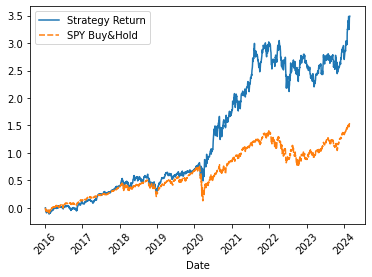

In [49]:
cum_returns_df = np.exp(np.log1p(comp_df).cumsum()) - 1

sns.lineplot(cum_returns_df)
plt.xticks(rotation=45)